In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Importing useful libraries
import numpy as np
import os
import copy
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 1 Breast Cancer Wisconsin Dataset

## 1.1 Loading the dataset 

In [2]:
from sklearn.datasets import load_breast_cancer

# Load as a sklearn bunch object
breast_cancer = load_breast_cancer()

# Convert to dataframe
cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
cancer['target'] = pd.Series(breast_cancer.target)

In [3]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 1.2 Investigating the Data

### 1.2.1 Why do we perform feature selection

In [4]:
# %%timeit

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Splitting the dataset into a training set (85%) and a testing set (15%) randomstate=123
cancer_train_X, cancer_test_X, cancer_train_y, cancer_test_y = train_test_split(cancer.drop('target', axis=1), cancer['target'], test_size=0.15, random_state=123)

# Creating a new instance of the standard scaler
scaler_func = StandardScaler()

cancer_train_X = scaler_func.fit_transform(cancer_train_X)
cancer_test_X = scaler_func.transform(cancer_test_X)

In [5]:
# %%timeit

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

tree_all = DecisionTreeClassifier()
tree_all.fit(cancer_train_X, cancer_train_y)

y_pred_train_all = tree_all.predict(cancer_train_X)
accuracy_train_all = accuracy_score(cancer_train_y, y_pred_train_all)
report_train_all = classification_report(cancer_train_y, y_pred_train_all)

y_pred_test_all = tree_all.predict(cancer_test_X)
accuracy_test_all = accuracy_score(cancer_test_y, y_pred_test_all)
report_test_all = classification_report(cancer_test_y, y_pred_test_all)

print('Tree depth:', tree_all.get_depth())
print('The accuracy on the training set:', accuracy_train_all)
print('\n', report_train_all)
print('The accuracy on the testing set:', accuracy_test_all)
print('\n', report_test_all)

Tree depth: 8
The accuracy on the training set: 1.0

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      1.00      1.00       307

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483

The accuracy on the testing set: 0.9651162790697675

               precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.96      0.98      0.97        50

    accuracy                           0.97        86
   macro avg       0.97      0.96      0.96        86
weighted avg       0.97      0.97      0.97        86



Section 1.2.1 investigates the results of training the decision tree classifier on the entire dataset. The %%timeit line was used at the top of the cells in the training stage and the prediction stage to measure the execution time. For the code to display properly, the %%timeit had to be commented out. However, the results have been recoreded and are as follows:

- 1.8 ms ± 15.9 µs
- 7.43 ms ± 121 µs per loop
- Accuracy 0.93

A similar test was done on the decision tree classifier after feature selection was performed. The corresponding code and results for the following can be found in Section 1.3 and Section 1.4.1:

- 1.55 ms ± 8.77 µs per loop
- 7.12 ms ± 95.6 µs per loop
- Accuracy 0.89

It can be seen that running the decision tree classifier on the entire dataset nets a 4% increase in accuracy while incurring a penalty of a 16% increased training time and a 4.4% increased prediction time. While 0.3 ms may seem insignificant, the current dataset is very small, with the training set only consisting of 483 instances while the testing set consists of 86 instances. If this model is to be deployed in an actual scenario, much larger datasets will be used to train and test it. 

When that occurs, the 16% penalty in compute time and the increased demand for compute power represents a significant financial burden on the organization using the machine learning model while providing only a 4% increase in accuracy.

However, we must consider the context of this classifier when talking about real world deployments. The model is used to detect cancer. Failing to accurately detect malignant tumors could potentially result in lawsuits or loss of confidence in the product. Further consultation with experts in the field is needed to determine if the increase in cost is worth the much smaller gain in accuracy.

### 1.2.2 Feature Selection

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

cancer_copy = copy.deepcopy(cancer)
cancer_copy.drop('target', axis=1, inplace=True)

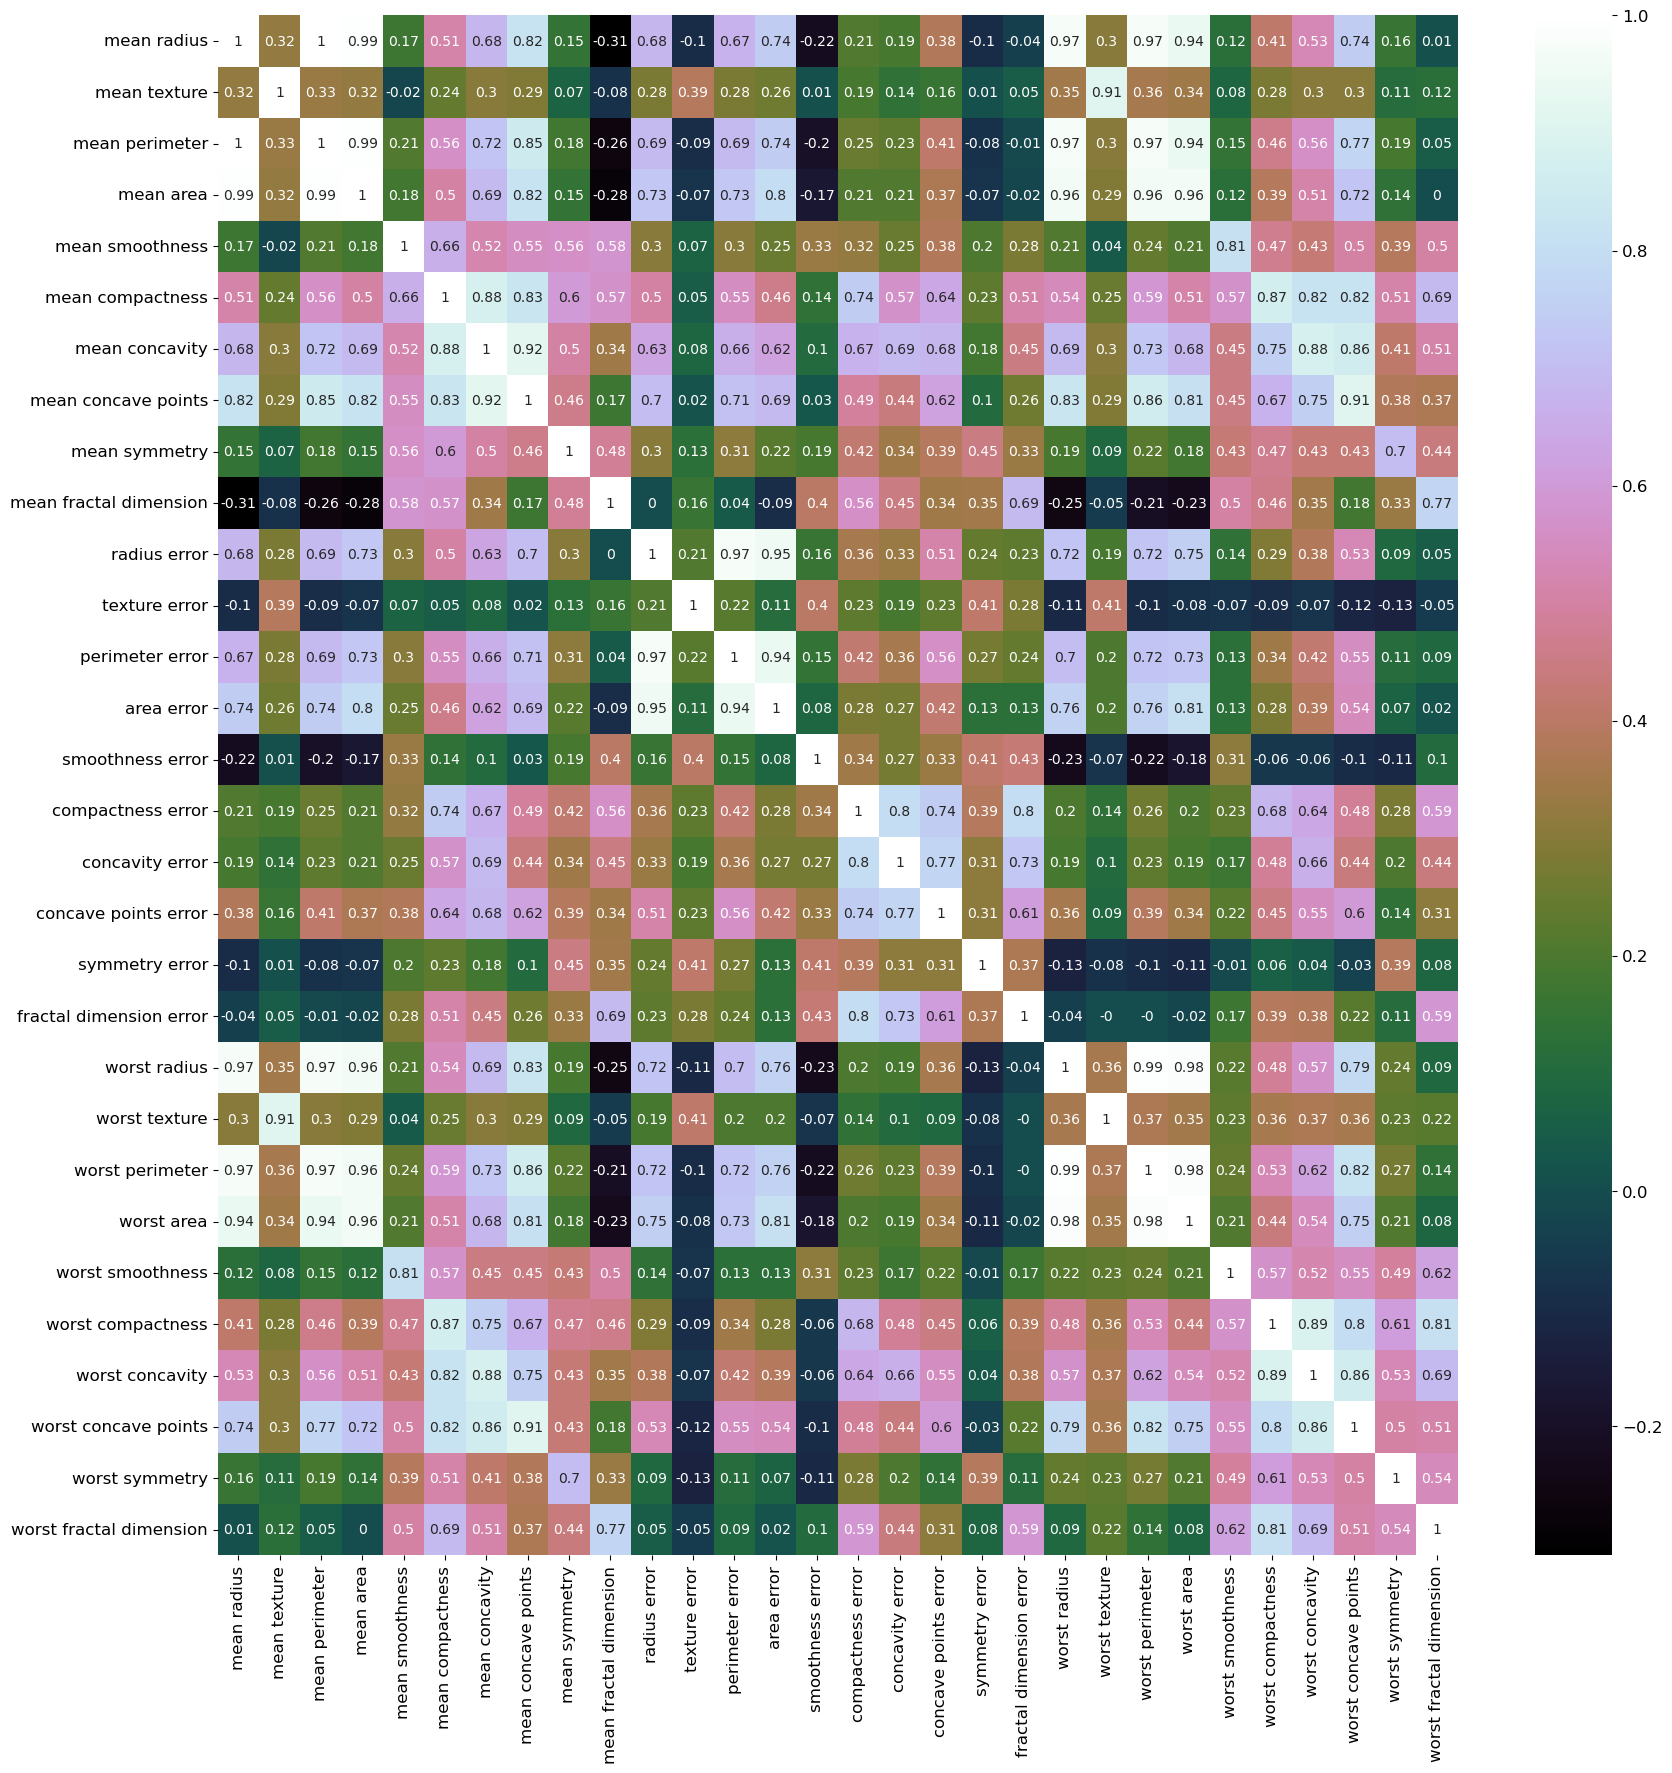

In [7]:
correlation_cancer = cancer_copy.corr().round(2)

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_cancer, cmap='cubehelix', annot=True)
plt.show()

When investigating if some features can be dropped due to a linear relationship, it is common to plot a scatter matrix that plots each feature against each other feature. However, in this dataset which contains 30 features, that would require 30^2 (900) plots. This is an unrealistic number to plot, display and sort through.

Therefore, the heatmap function from the seaborn library was used to plot a correlation matrix. The correlation value between a pair of features measures the degree of the linear relationship that they have. If the two features have a high correlation score (approaching 1) it means that they are linear and measure the same variable. Having too many highly correlated variables may present problems in the following ways:

- **Overfitting**: The model may make splits based on a small number of highly correlated features. This may cause overfitting problems.
- **Redundancy**: As seen in section 1.2.1 removing highly correlated features only gives a small drop in accuracy while providing a significant increase in performance. This is because highly correlated features provide very little additional benefits in classification while adding unecessary complexity.

We will loop through this correlation matrix and drop any feature that has a correlation with 0.9 or more. 

In [8]:
cancer_copy = copy.deepcopy(cancer)
cancer_copy.drop('target', axis=1, inplace=True)

# create a set to hold the names of the features to drop
to_drop = set()

# iterate over the columns in the correlation matrix
for col in range(len(correlation_cancer.columns)):
    # iterate over the rows in the correlation matrix
    for row in range(col):
        # check if the absolute correlation value is greater than 0.9
        if abs(correlation_cancer.iloc[row, col]) > 0.9:
            # if so, add the name of the feature to the set of features to drop
            colname = correlation_cancer.columns[col]
            to_drop.add(colname)

# drop the features with high correlation
cancer_copy = cancer_copy.drop(to_drop, axis=1)

In [9]:
cancer_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean smoothness          569 non-null    float64
 3   mean compactness         569 non-null    float64
 4   mean concavity           569 non-null    float64
 5   mean symmetry            569 non-null    float64
 6   mean fractal dimension   569 non-null    float64
 7   radius error             569 non-null    float64
 8   texture error            569 non-null    float64
 9   smoothness error         569 non-null    float64
 10  compactness error        569 non-null    float64
 11  concavity error          569 non-null    float64
 12  concave points error     569 non-null    float64
 13  symmetry error           569 non-null    float64
 14  fractal dimension error  5

The cell above shows the features that remain in our dataset after removing all features with a correlation value of 0.9 or more. It is noted that 20 features remain of the original 30 features. 

The following plot shows a scatter matrix for five of the variables that were eliminated. This is a demonstration that shows that the eliminated features did indeed have a high correlation value as the plots show a linear relationship with the 'mean radius' feature. 

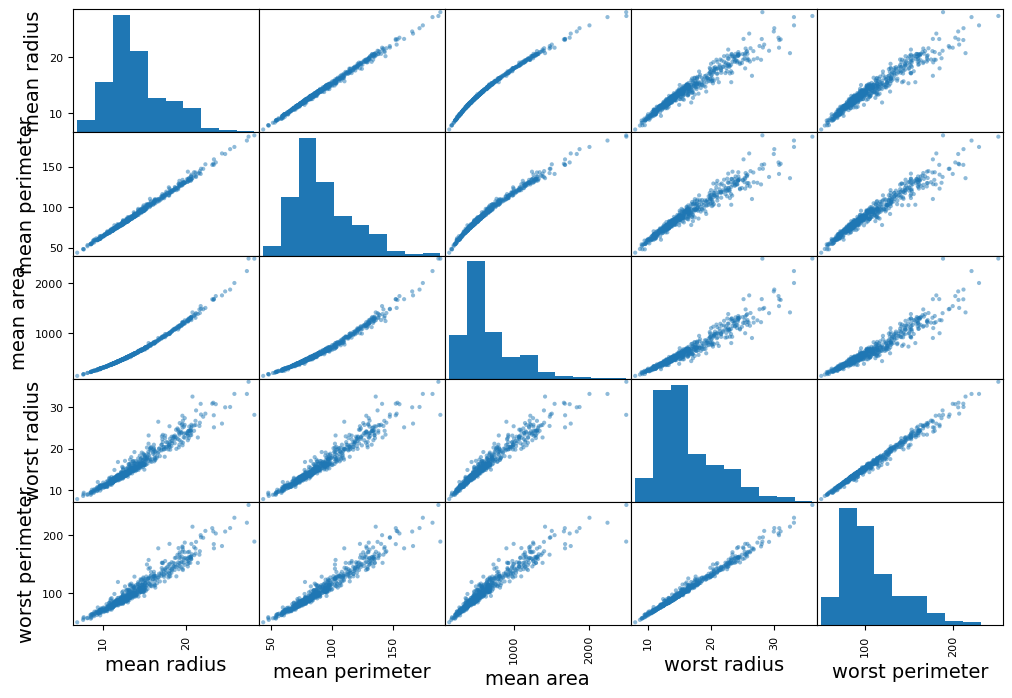

In [10]:
from pandas.plotting import scatter_matrix

attributes = ['mean radius', 'mean perimeter', 'mean area', 'worst radius', 'worst perimeter']

scatter_matrix(cancer[attributes], figsize=(12,8))
plt.show()

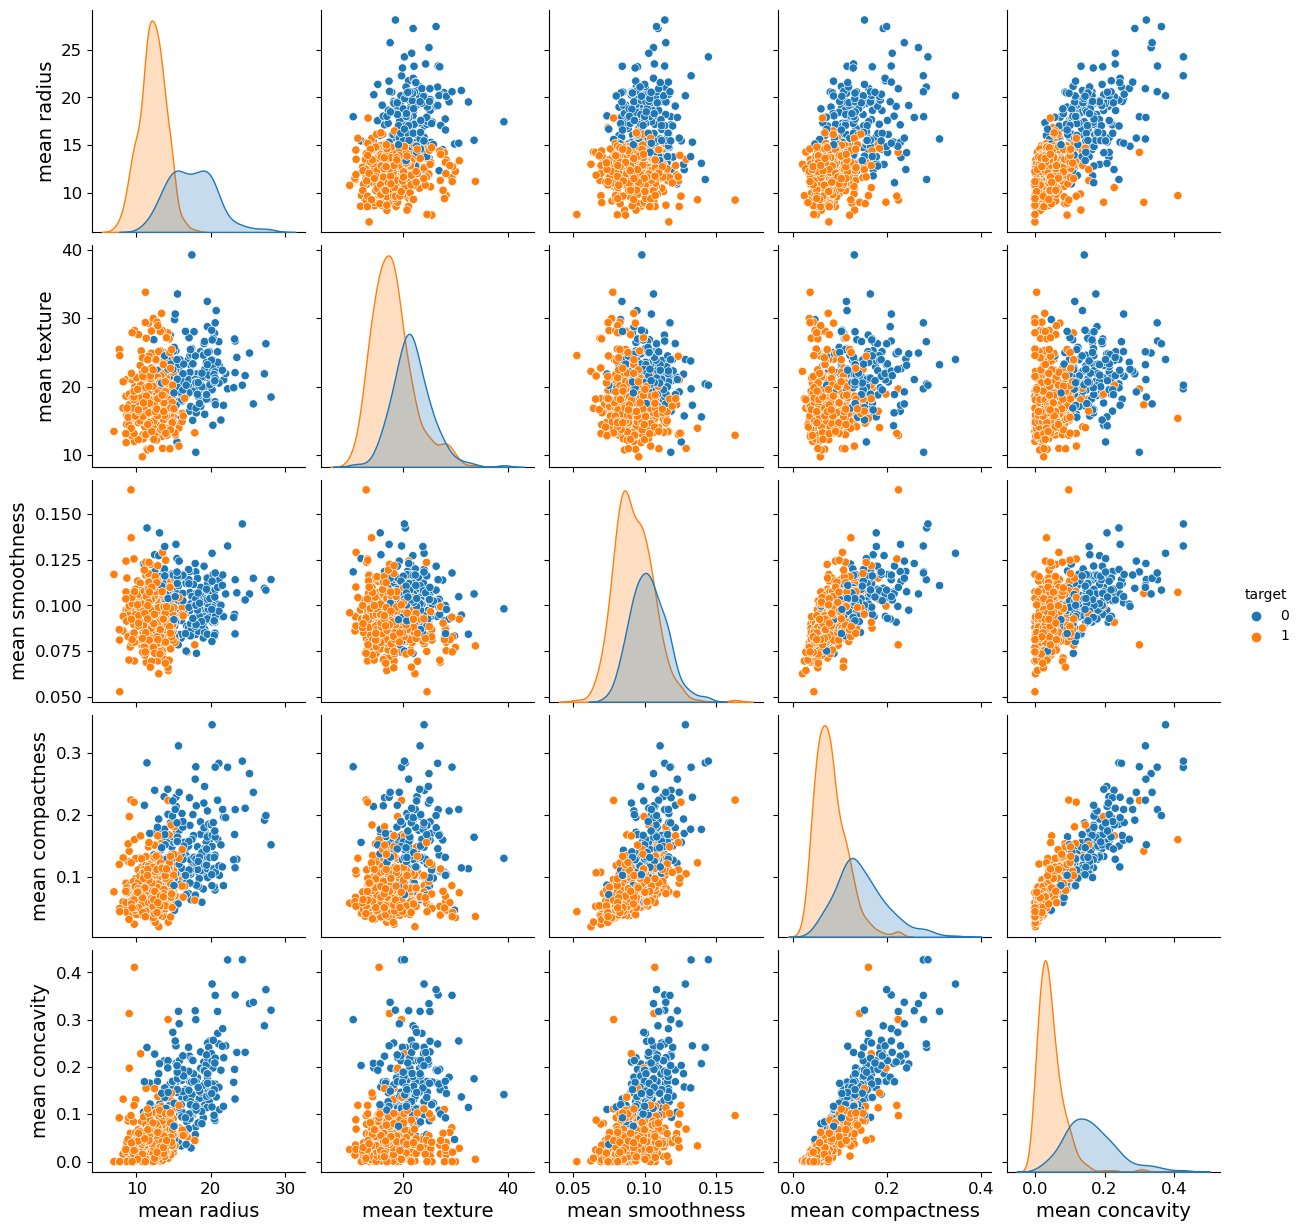

In [11]:
# select the first 5 features to plot
first_five = cancer_copy.columns[:5]

# Plot the relationship between features and target
sns.pairplot(cancer, vars=first_five, hue='target')
plt.show()

The plot above is a visualization of the first five features that remain in our dataset. The points from each class have been plotted in a different colour. 

It can be seen from these point plots that the points from the two classes are relatively well seperated. This indicates that we have done a good job in dropping the features in the previous step and the following classification task will be relatively easy.

## 1.3 Preparing the training and test sets

In [12]:
# %%timeit

# Splitting the dataset into a training set (85%) and a testing set (15%) randomstate=123
cancer_train_X, cancer_test_X, cancer_train_y, cancer_test_y = train_test_split(cancer_copy, cancer['target'], test_size=0.15, random_state=123)

# # Creating a new instance of the standard scaler
# scaler_func = StandardScaler()

# cancer_train_X = scaler_func.fit_transform(cancer_train_X)
# cancer_test_X = scaler_func.transform(cancer_test_X)

## 1.4 Decision Trees

In [13]:
# defining a set to store the accuracies of different classifiers
train_accuracy_set = list()
test_accuracy_set = list()

# defining a set to store the prrecision of different classifiers
train_precision_set = list()
test_precision_set = list()

# defining a set to store the recalls of different classifiers
train_recall_set = list()
test_recall_set = list()

### 1.4.1 Default Hyperparameters

In [14]:
from sklearn.metrics import precision_score, recall_score
# %%timeit

tree_default = DecisionTreeClassifier(random_state=42)
tree_default.fit(cancer_train_X, cancer_train_y)

y_pred_train_default = tree_default.predict(cancer_train_X)
accuracy_train_default = accuracy_score(cancer_train_y, y_pred_train_default)
precision_train_default = precision_score(cancer_train_y, y_pred_train_default)
recall_train_default = recall_score(cancer_train_y, y_pred_train_default)
train_accuracy_set.append(accuracy_train_default)
train_precision_set.append(precision_train_default)
train_recall_set.append(recall_train_default)

y_pred_test_default = tree_default.predict(cancer_test_X)
accuracy_test_default = accuracy_score(cancer_test_y, y_pred_test_default)
precision_test_default = precision_score(cancer_test_y, y_pred_test_default)
recall_test_default = recall_score(cancer_test_y, y_pred_test_default)
test_accuracy_set.append(accuracy_test_default)
test_precision_set.append(precision_test_default)
test_recall_set.append(recall_test_default)

print('Tree depth:', tree_default.get_depth())
print('The accuracy on the training set:', accuracy_train_default)
print('The precision on the training set:', precision_train_default)
print('The recall on the training set:', recall_train_default)
print('The accuracy on the testing set:', accuracy_test_default)
print('The precision on the testing set:', precision_test_default)
print('The recall on the testing set:', recall_test_default)

Tree depth: 7
The accuracy on the training set: 1.0
The precision on the training set: 1.0
The recall on the training set: 1.0
The accuracy on the testing set: 0.9069767441860465
The precision on the testing set: 0.9038461538461539
The recall on the testing set: 0.94


**In-depth discussion of accuracy, precision and recall will be done in section 1.7**

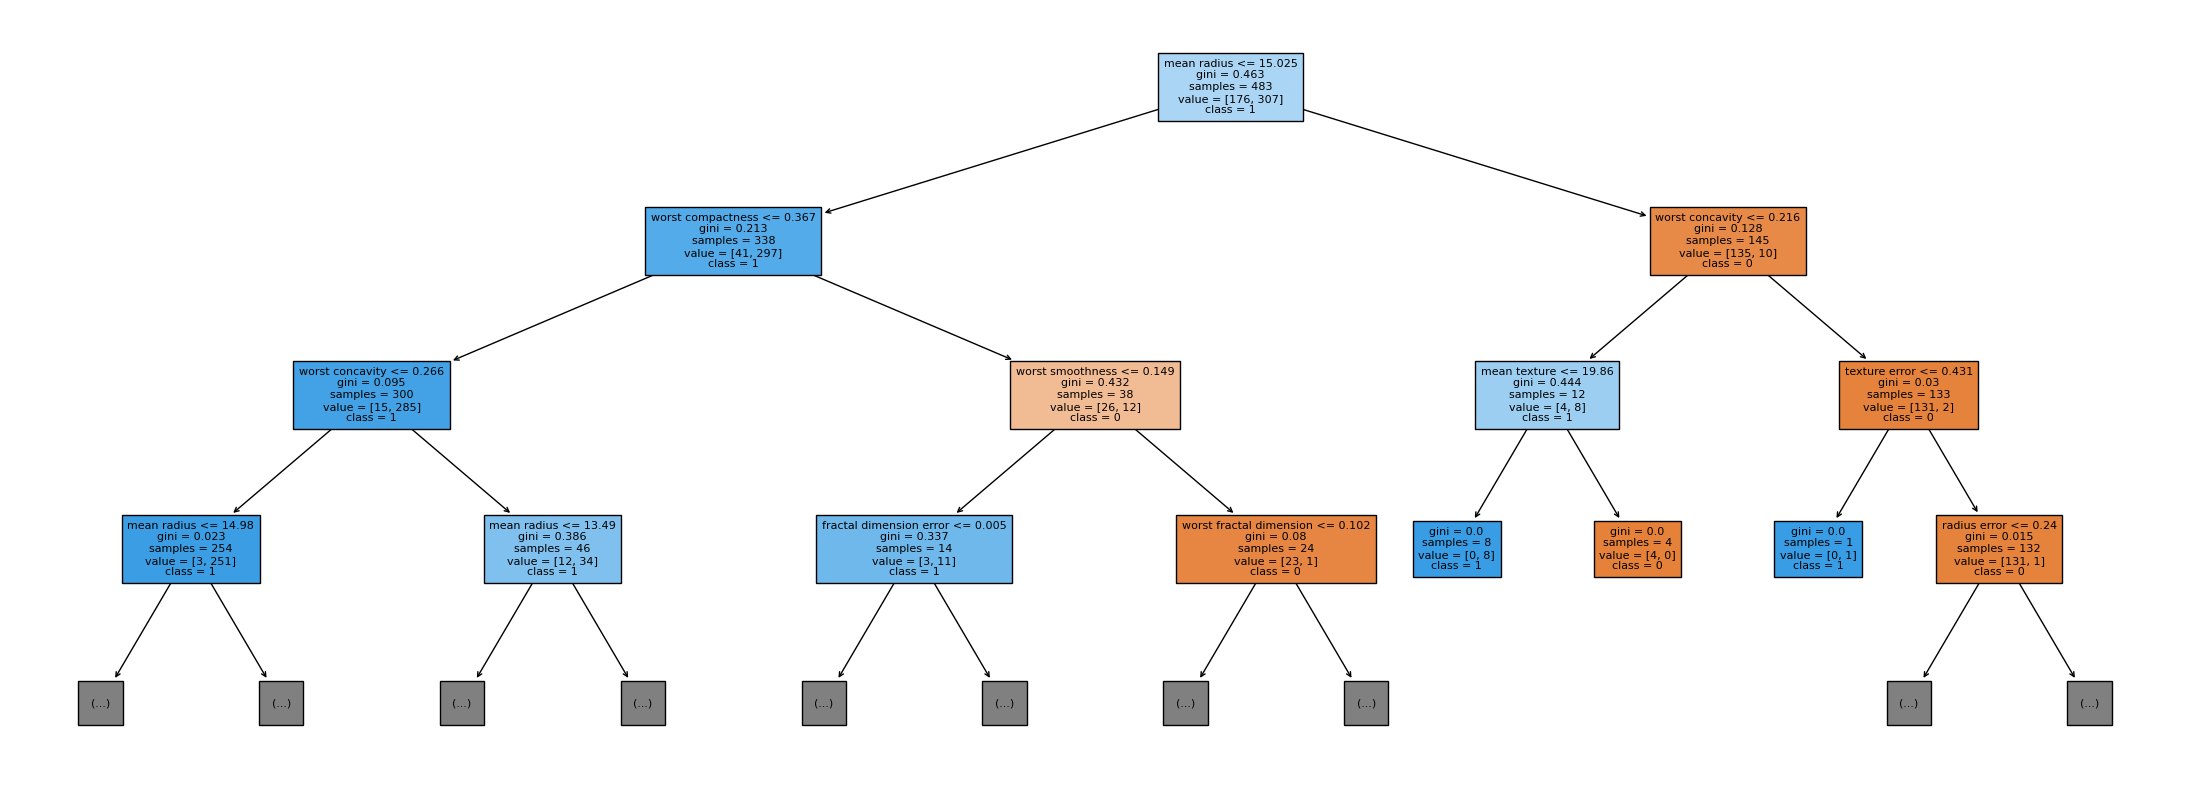

In [15]:
# Display the decision tree built from the training process (limited to max_depth=3)
plt.figure(figsize=(28, 10))
plot_tree(tree_default, max_depth=3, filled=True, feature_names=cancer_copy.columns, class_names=['0','1'],fontsize=8)
plt.show()

### 1.4.2 Restricting Depth to 3

In [16]:
tree_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_depth.fit(cancer_train_X, cancer_train_y)

y_pred_train_depth = tree_depth.predict(cancer_train_X)
accuracy_train_depth = accuracy_score(cancer_train_y, y_pred_train_depth)
precision_train_depth = precision_score(cancer_train_y, y_pred_train_depth)
recall_train_depth = recall_score(cancer_train_y, y_pred_train_depth)
train_accuracy_set.append(accuracy_train_depth)
train_precision_set.append(precision_train_depth)
train_recall_set.append(recall_train_depth)

y_pred_test_depth = tree_depth.predict(cancer_test_X)
accuracy_test_depth = accuracy_score(cancer_test_y, y_pred_test_depth)
precision_test_depth = precision_score(cancer_test_y, y_pred_test_depth)
recall_test_depth = recall_score(cancer_test_y, y_pred_test_depth)
test_accuracy_set.append(accuracy_test_depth)
test_precision_set.append(precision_test_depth)
test_recall_set.append(recall_test_depth)

print('Tree depth:', tree_depth.get_depth())
print('The accuracy on the training set:', accuracy_train_depth)
print('The precision on the training set:', precision_train_depth)
print('The recall on the training set:', recall_train_depth)
print('The accuracy on the testing set:', accuracy_test_depth)
print('The precision on the testing set:', precision_test_depth)
print('The recall on the testing set:', recall_test_depth)

Tree depth: 3
The accuracy on the training set: 0.9585921325051759
The precision on the training set: 0.9442724458204335
The recall on the training set: 0.993485342019544
The accuracy on the testing set: 0.8837209302325582
The precision on the testing set: 0.8703703703703703
The recall on the testing set: 0.94


**In-depth discussion of accuracy, precision and recall will be done in section 1.7**

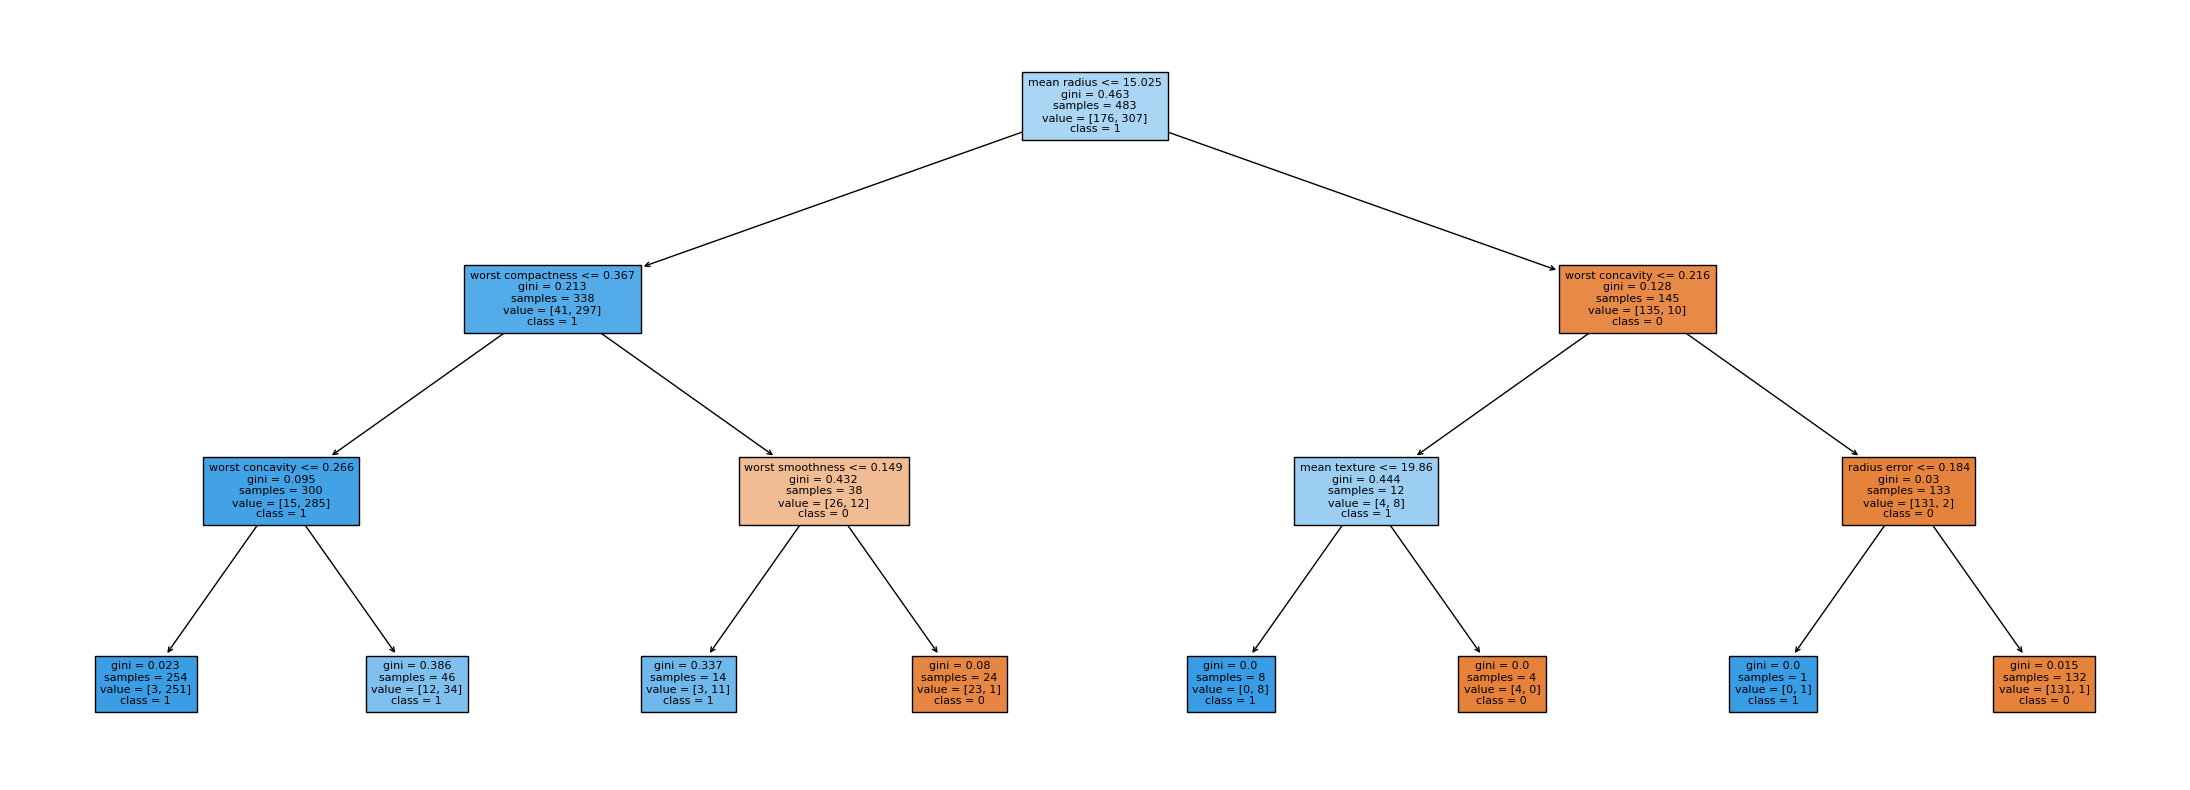

In [17]:
# Display the decision tree built from the training process (limited to max_depth=3)
plt.figure(figsize=(28, 10))
plot_tree(tree_depth, max_depth=3, filled=True, feature_names=cancer_copy.columns, class_names=['0','1'],fontsize=8)
plt.show()

### 1.4.3 Setting Min Samples Split  to 5

In [18]:
tree_split = DecisionTreeClassifier(min_samples_split=5, random_state=42)
tree_split.fit(cancer_train_X, cancer_train_y)

y_pred_train_split = tree_split.predict(cancer_train_X)
accuracy_train_split = accuracy_score(cancer_train_y, y_pred_train_split)
precision_train_split = precision_score(cancer_train_y, y_pred_train_split)
recall_train_split = recall_score(cancer_train_y, y_pred_train_split)
train_accuracy_set.append(accuracy_train_split)
train_precision_set.append(precision_train_split)
train_recall_set.append(recall_train_split)

y_pred_test_split = tree_split.predict(cancer_test_X)
accuracy_test_split = accuracy_score(cancer_test_y, y_pred_test_split)
precision_test_split = precision_score(cancer_test_y, y_pred_test_split)
recall_test_split = recall_score(cancer_test_y, y_pred_test_split)
test_accuracy_set.append(accuracy_test_split)
test_precision_set.append(precision_test_split)
test_recall_set.append(recall_test_split)

print('Tree split:', tree_split.get_depth())
print('The accuracy on the training set:', accuracy_train_split)
print('The precision on the training set:', precision_train_split)
print('The recall on the training set:', recall_train_split)
print('The accuracy on the testing set:', accuracy_test_split)
print('The precision on the testing set:', precision_test_split)
print('The recall on the testing set:', recall_test_split)

Tree split: 7
The accuracy on the training set: 0.9917184265010351
The precision on the training set: 1.0
The recall on the training set: 0.9869706840390879
The accuracy on the testing set: 0.9069767441860465
The precision on the testing set: 0.9038461538461539
The recall on the testing set: 0.94


**In-depth discussion of accuracy, precision and recall will be done in section 1.7**

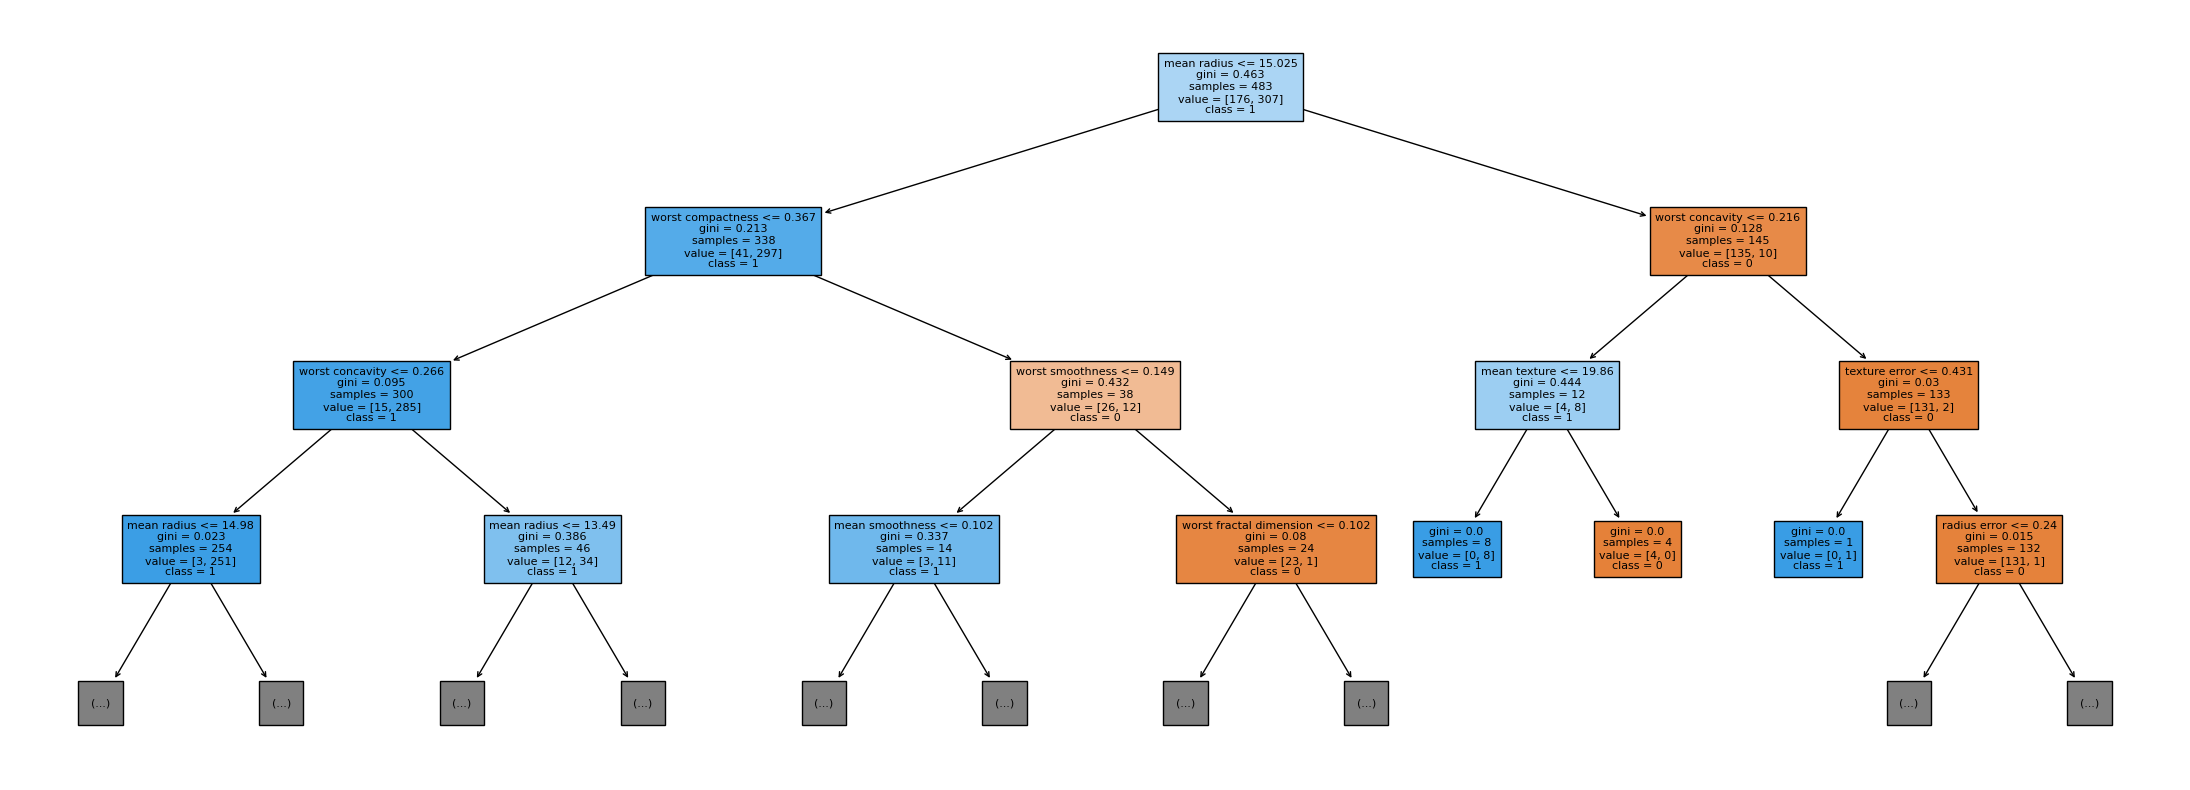

In [19]:
# Display the decision tree built from the training process (limited to max_depth=3)
plt.figure(figsize=(28, 10))
plot_tree(tree_split, max_depth=3, filled=True, feature_names=cancer_copy.columns, class_names=['0','1'],fontsize=8)
plt.show()

### 1.4.4 Setting Min Samples Leaf to 5

In [20]:
tree_leaf = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_leaf.fit(cancer_train_X, cancer_train_y)

y_pred_train_leaf = tree_leaf.predict(cancer_train_X)
accuracy_train_leaf = accuracy_score(cancer_train_y, y_pred_train_leaf)
precision_train_leaf = precision_score(cancer_train_y, y_pred_train_leaf)
recall_train_leaf = recall_score(cancer_train_y, y_pred_train_leaf)
train_accuracy_set.append(accuracy_train_leaf)
train_precision_set.append(precision_train_leaf)
train_recall_set.append(recall_train_leaf)

y_pred_test_leaf = tree_leaf.predict(cancer_test_X)
accuracy_test_leaf = accuracy_score(cancer_test_y, y_pred_test_leaf)
precision_test_leaf = precision_score(cancer_test_y, y_pred_test_leaf)
recall_test_leaf = recall_score(cancer_test_y, y_pred_test_leaf)
test_accuracy_set.append(accuracy_test_leaf)
test_precision_set.append(precision_test_leaf)
test_recall_set.append(recall_test_leaf)

print('Tree Depth:', tree_leaf.get_depth())
print('The accuracy on the training set:', accuracy_train_leaf)
print('The precision on the training set:', precision_train_leaf)
print('The recall on the training set:', recall_train_leaf)
print('The accuracy on the testing set:', accuracy_test_leaf)
print('The precision on the testing set:', precision_test_leaf)
print('The recall on the testing set:', recall_test_leaf)

Tree Depth: 6
The accuracy on the training set: 0.9772256728778468
The precision on the training set: 0.9966442953020134
The recall on the training set: 0.9674267100977199
The accuracy on the testing set: 0.8837209302325582
The precision on the testing set: 0.9166666666666666
The recall on the testing set: 0.88


**In-depth discussion of accuracy, precision and recall will be done in section 1.7**

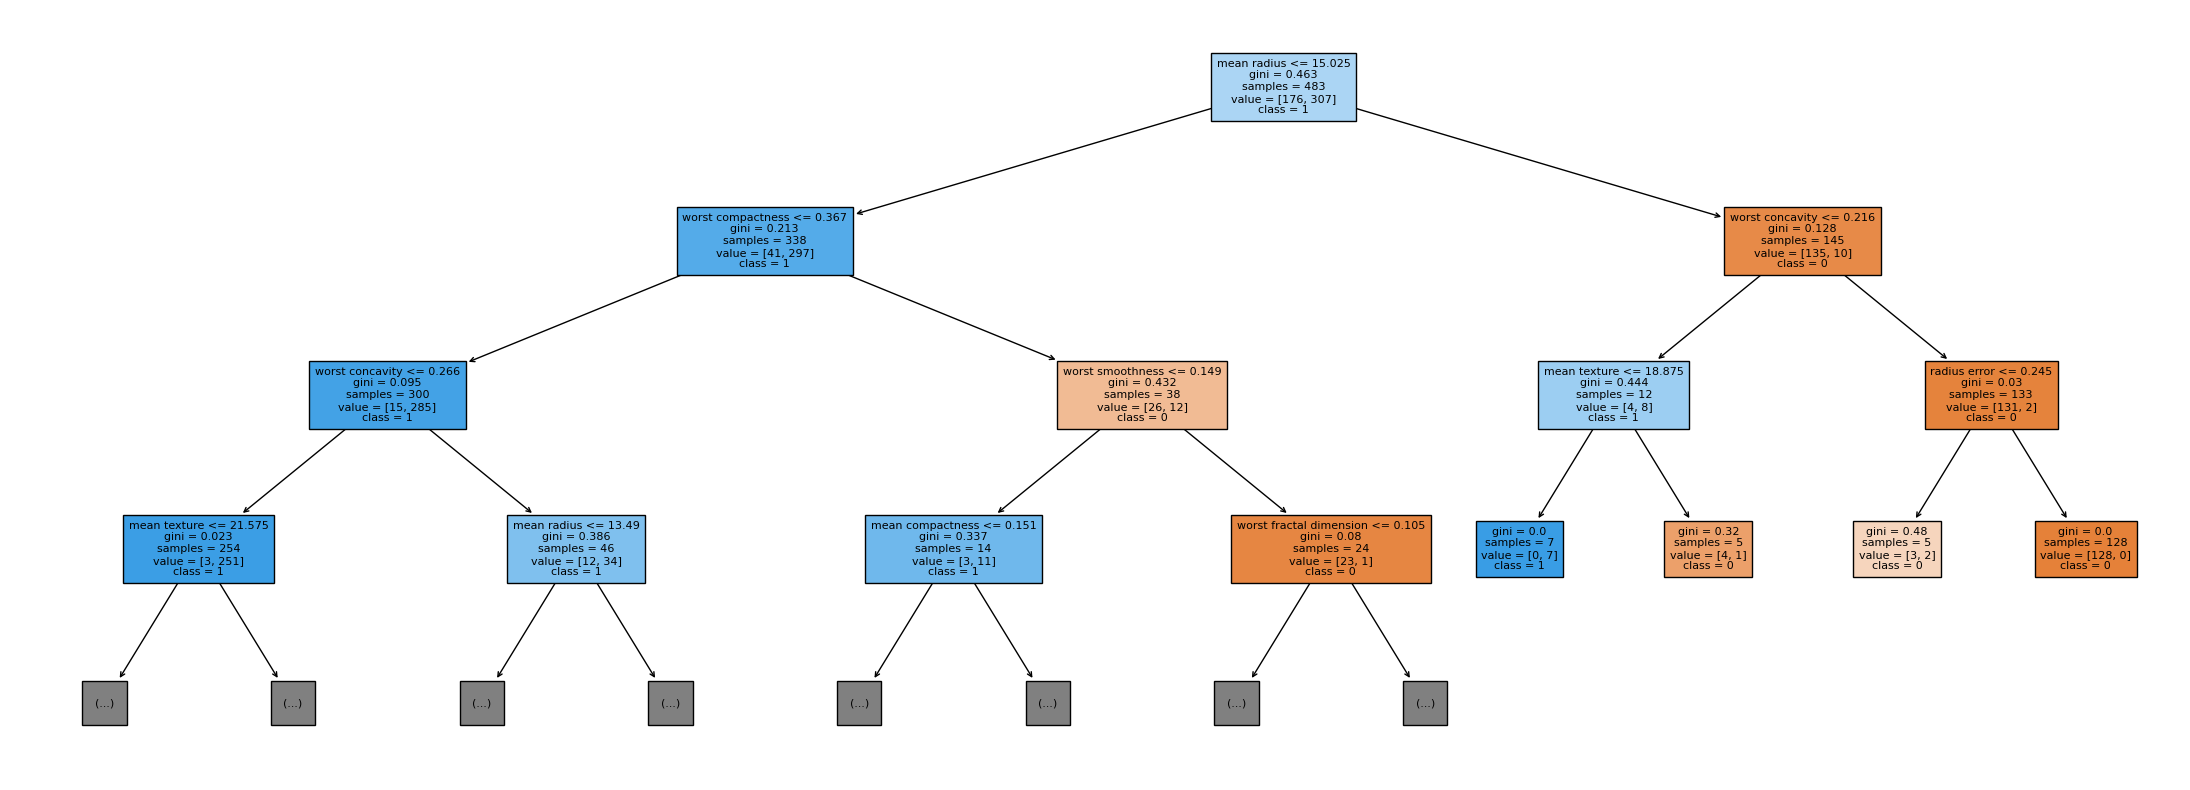

In [21]:
# Display the decision tree built from the training process (limited to max_depth=3)
plt.figure(figsize=(28, 10))
plot_tree(tree_leaf, max_depth=3, filled=True, feature_names=cancer_copy.columns, class_names=['0','1'],fontsize=8)
plt.show()

## 1.5 Using Cross-Validation to find best hyperparameters

In [22]:
from sklearn.model_selection import GridSearchCV

# Create a new Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and their possible values for grid search
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Create a grid search object with 3-fold cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=3, scoring='accuracy')
# Fit the grid search object to the training data
grid_search.fit(cancer_train_X, cancer_train_y)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9358178053830227


Section 1.5 covers using a grid search with 3 fold cross validation to find the best hyperparameters for `max_depth`, `min_samples_split` and `min_samples_leaf`. 

`max_depth`: A range of 1-8 was chosen for this hyperparameter as we want to get a good range of values for this. A small max_depth would mean that the tree is less prone to overfitting and generalize better. The tree in section 1.4.1 had a depth of 7 and was already shown to be overfitting, so we do not expect the grid search to find a best parameter of `max_depth` beyond this point.

`min_samples_split`: The greater the value of `min_samples_split`, the simpler the tree becomes. However, the tree would also be prone to underfitting. Therefore, it would be good to have a wide range of values for this hyperparameter to examine the impact on the validation set. 

`min_samples_leaf`: The greater the value of `min_samples_leaf`, the simpler the tree becomes. A good balance of this hyperparameter must be found in order to prevent the tree from overfitting or underfitting.

**The best hyperparameters are**:

- max_depth=3
- min_samples_leaf=1
- min_samples_split=2

The grid search has found the values of the hyperparameters which get the best balance between overfitting and underfitting. 

## 1.6 Training Model on best Hyperparameters

In [23]:
tree_best = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)
tree_best.fit(cancer_train_X, cancer_train_y)

y_pred_train_best = tree_best.predict(cancer_train_X)
accuracy_train_best = accuracy_score(cancer_train_y, y_pred_train_best)
precision_train_best = precision_score(cancer_train_y, y_pred_train_best)
recall_train_best = recall_score(cancer_train_y, y_pred_train_best)
train_accuracy_set.append(accuracy_train_best)
train_precision_set.append(precision_train_best)
train_recall_set.append(recall_train_best)

y_pred_test_best = tree_best.predict(cancer_test_X)
accuracy_test_best = accuracy_score(cancer_test_y, y_pred_test_best)
precision_test_best = precision_score(cancer_test_y, y_pred_test_best)
recall_test_best = recall_score(cancer_test_y, y_pred_test_best)
test_accuracy_set.append(accuracy_test_best)
test_precision_set.append(precision_test_best)
test_recall_set.append(recall_test_best)

print('Tree Depth:', tree_best.get_depth())
print('The accuracy on the training set:', accuracy_train_best)
print('The precision on the training set:', precision_train_best)
print('The recall on the training set:', recall_train_best)
print('The accuracy on the testing set:', accuracy_test_best)
print('The precision on the testing set:', precision_test_best)
print('The recall on the testing set:', recall_test_best)

Tree Depth: 3
The accuracy on the training set: 0.9585921325051759
The precision on the training set: 0.9442724458204335
The recall on the training set: 0.993485342019544
The accuracy on the testing set: 0.8837209302325582
The precision on the testing set: 0.8703703703703703
The recall on the testing set: 0.94


**In-depth discussion of accuracy, precision and recall will be done in section 1.7**

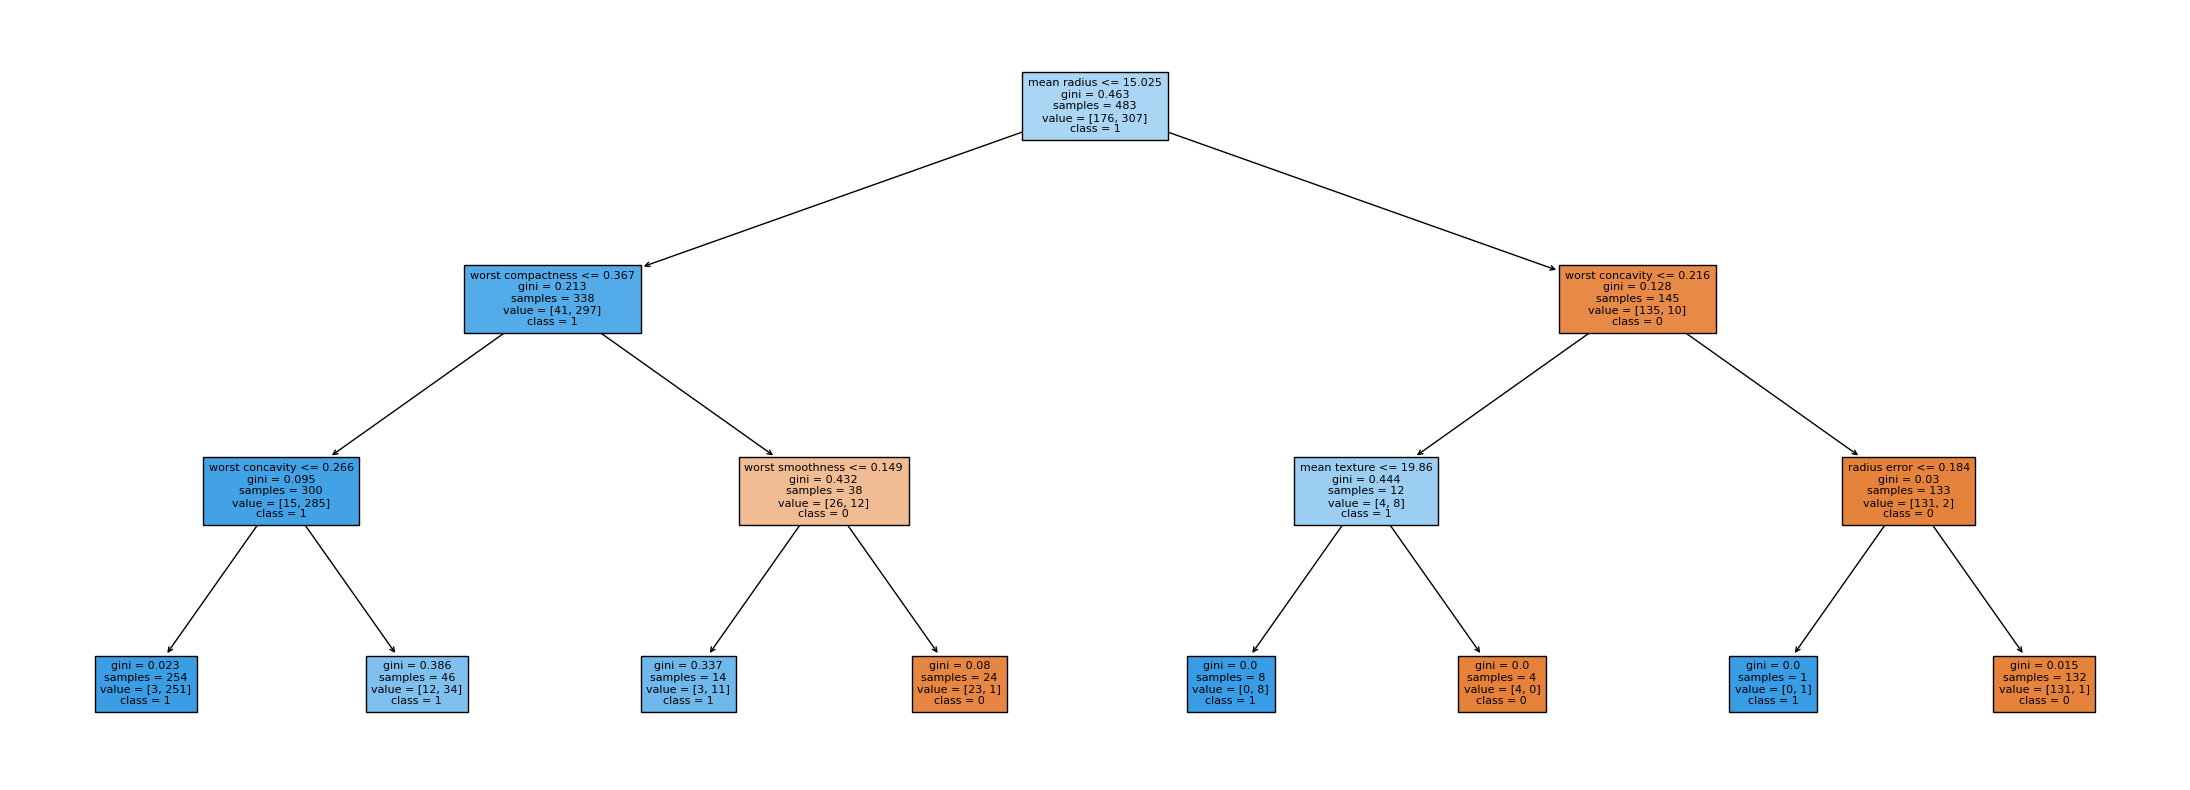

In [24]:
# Display the decision tree built from the training process (limited to max_depth=3)
plt.figure(figsize=(28, 10))
plot_tree(tree_best, max_depth=3, filled=True, feature_names=cancer_copy.columns, class_names=['0','1'],fontsize=8)
plt.show()

## 1.7 Comparison

In [25]:
labels_train = ['Unconstrained', 'Max_Depth=3', 'Min_Samples_Split=5', 'Min_Samples_Leaf=5', 'Tuned Classifier']
labels_test = ['Unconstrained', 'Max_Depth=3', 'Min_Samples_Split=5', 'Min_Samples_Leaf=5', 'Tuned Classifier']

def plot_bars(train, test, title, ax_label):
    colors = ['#8dd3c7', '#bebada', '#fb8072', '#80b1d3', '#fdb462']
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # create a bar chart for the first set of values and labels
    axs[0].bar(labels_train, train, color=colors, width=0.9)
    for i, v in enumerate(train):
        axs[0].text(i, v, f"{v:.4f}", ha='center', va='bottom', fontsize=10)
    axs[0].set_title(title + ' Training Set')
    axs[0].set_xlabel('Models')
    axs[0].set_ylabel(ax_label)
    axs[0].set_xticks(range(len(labels_train)))
    axs[0].set_xticklabels(labels_train, rotation=45)

    # create a bar chart for the second set of values and labels
    axs[1].bar(labels_test, test, color=colors, width=0.9)
    for i, v in enumerate(test):
        axs[1].text(i, v, f"{v:.4f}", ha='center', va='bottom', fontsize=10)
    axs[1].set_title(title + ' Testing Set')
    axs[1].set_xlabel('Models')
    axs[1].set_ylabel(ax_label)
    axs[1].set_xticks(range(len(labels_test)))
    axs[1].set_xticklabels(labels_test, rotation=45)

    plt.tight_layout()  # adjust spacing between subplots
    plt.show()

In [26]:
from sklearn.model_selection import cross_val_predict

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(predictions, labels, y):
    # Create the figure and axis objects
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

    # Loop through each axis and plot the corresponding confusion matrix
    for i, ax in enumerate(axs.ravel()):
        if i < len(predictions):
            # Calculate the confusion matrix
            conf_matrix = confusion_matrix(y, predictions[i])

            # Plot the confusion matrix
            disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, figsize=(8, 8))
            disp.plot(ax=ax, cmap='Oranges', values_format='.0f') # use 'Oranges_r' to reverse the orange colormap
            disp.ax_.set_xlabel('Predicted Label')
            disp.ax_.set_ylabel('True Label')
            disp.ax_.set_title(labels[i])

            # Calculate the accuracy values
            accuracy_0 = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
            accuracy_1 = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])

            # Add accuracy text to the axis
            text = f'Accuracy:\n0: {accuracy_0:.2f}\n1: {accuracy_1:.2f}'
            disp.ax_.text(0.5, -0.2, text, ha='center', va='center', transform=disp.ax_.transAxes, fontsize=12)

    # Add some space between the plots and show the figure
    fig.tight_layout()
    fig.delaxes(axs[2][1])
    plt.show()

It is important to note that in the `Breast cancer wisconsin (diagnostic) dataset`, 0 (the negative case) represents Maligant tumours and 1 (the positive case) represents Benign tumours. This is contrary to normal pathology reports where a positive case means that a tumor is Maligant. This will be relevant to all discussion found in sections 1.7.1 - 1.7.4. 

Section 1.7.1-1.7.4 compares the accuracies, precisions, recalls and confusion matrices for the five Decision Tree classifiers that were trained in the previous sections. To avoid any ambiguity, here are the labels that are used to describe each classifier as well as the sections that there were trained in:

- **Unconstrained**: The decision tree classifier using the default values for all the hyperparameters. This was trained in section 1.4.1
- **Max_Depth=3**: The decision tree classifier using `max_depth=3` and default values for all other hyperparameters. This was trained in section 1.4.2
- **Min_Samples_Split=5**: The decision tree classifier using `Min_Samples_Split=5` and default values for all other hyperparameters. This was trained in section 1.4.3
- **Min_Samples_Leaf=5**: The decision tree classifier using `Min_Samples_leaf=5` and default values for all other hyperparameters. This was trained in section 1.4.4
- **Tuned Classifier**: The classifier that used 3-fold cross-validation and grid-search to find the best combination of the hyperparameters (max depth, min samples split and min samples leaf). The grid search was conducted in section 1.5 and the classifier was trained in section 1.6. This classifier has the hyperparameter values (`max_depth=3`, `min_samples_split=1` and `min_samples_leaf=2`).

### 1.7.1 Comparing Accuracy for Different Classifiers

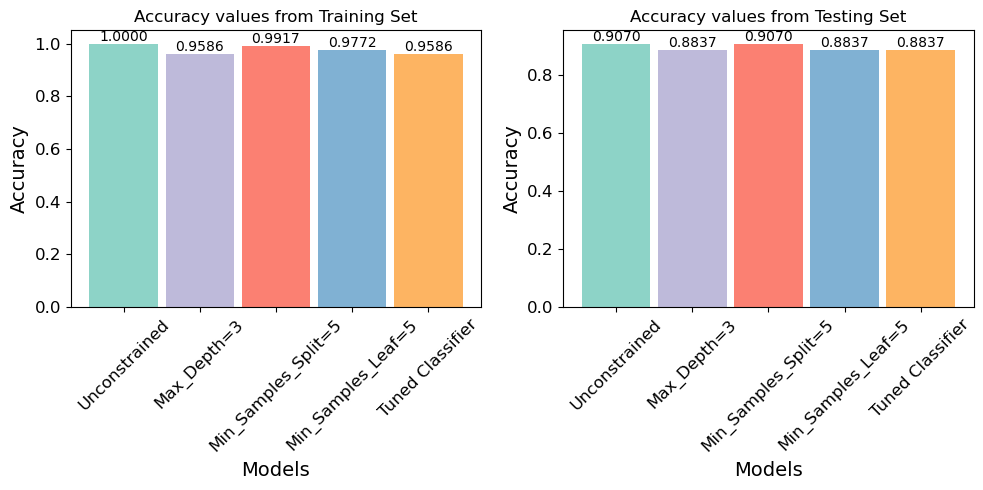

In [28]:
plot_bars(train_accuracy_set, test_accuracy_set, 'Accuracy values from', 'Accuracy')

The accuracy score provides a valuable metric to evaluate the performance of a classifier by measuring the ratio of correct predictions to the total number of predictions. By analyzing the accuracy score of a classifier on both the training and test sets, we can gain valuable insights into how well the classifier performs on new, unseen data. This can help us determine whether the classifier is capable of generalizing effectively and making accurate predictions on real-world data.

The plot on the left shows the accuracy values from the training set while the plot on the right shows the accuracy values from the testing set.

- **Unconstrained**: The classifier achieved a perfect accuracy of 1.0 on the training set, but its accuracy dropped significantly to 0.91 on the test set. This suggests that the classifier has memorized the training set and is not able to generalize well to new data, which is a classic sign of overfitting
- **Max_Depth=3**: The decision tree classifier with max_depth=3 achieved an accuracy of 0.96 on the training set, which is lower than the default classifier. However, its accuracy on the test set is also lower than the default classifier at 0.88, which suggests that it is still overfitting to some extent. 
- **Min_Samples_Split=5**: The decision tree classifier with Min_Samples_Split=5 achieved an accuracy of 0.99 on the training set, which is lower than the default classifier. However, its accuracy on the test set is the same as the default classifier at 0.91, which suggests that it may be generalizing better than the default classifier.
- **Min_Samples_Leaf=5**: The decision tree classifier with Min_Samples_leaf=5 achieved an accuracy of 0.98 on the training set, which is also lower than the default classifier. Its accuracy on the test set is the same as the decision tree classifier with max_depth=3 at 0.88, which suggests that it may also be overfitting to some extent.
- **Tuned Classifier**: The decision tree classifier that used 3-fold cross-validation and grid-search to find the best combination of hyperparameters achieved an accuracy of 0.96 on the training set. However, it only scored 0.88 on the testing set which suggests that the classifier is still overfitting. This classifier performs identically to the classifier with `max_depth=3` having the same accuracies on both the test and training set. This suggests that constraining the max_depth hyperparameter outweighs changing the other two hyperparameters with regards to this model. 



### 1.7.2 Comparing Precision

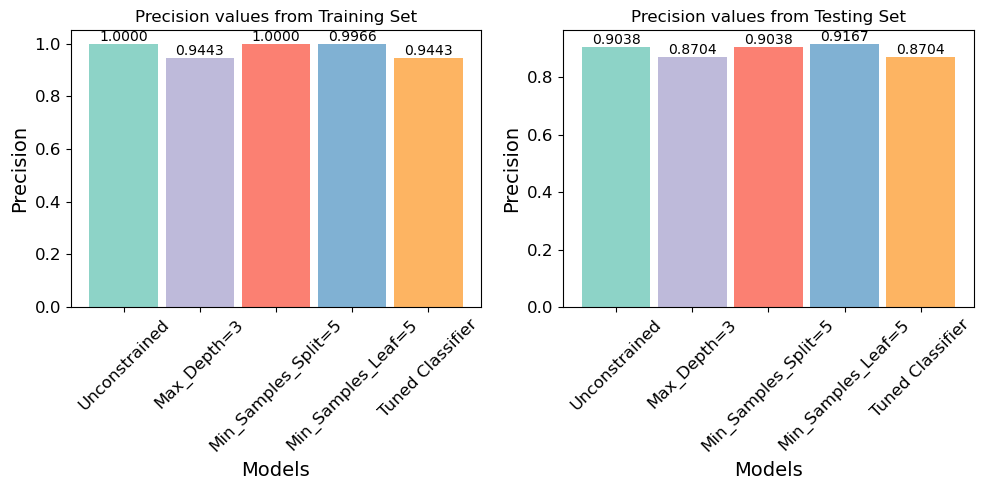

In [29]:
plot_bars(train_precision_set, test_precision_set, 'Precision values from', 'Precision')

Precision is defined as the ratio of true positives (TP) to the sum of true positives and false positives (FP):

Precision = TP / (TP + FP)

In other words, precision measures the proportion of correct positive predictions out of all the positive predictions made by the model. A high precision value indicates that the model is making very few false positive predictions. In terms of the cancer dataset, a true positive would mean a benign tumor while a false positive would mean a malignant tumor that was falsely classified as benign. 

Precision is particularly important when the cost of false positives is high. This is very relevant to the cancer dataset as a false positive could lead to cancer being undiagnosed, which could be fatal to the patient.

From the precision results on the training and test set, we can see that the gap between precision on the training set and precision on the test set for `Unconstrained`, `Min_Samples_Split=5` and `Min_Samples_Leaf=5`is very large. Therefore, it is likely that they are overfitting the training data.

On the other hand, classifiers `Max_Depth=3` and `Tuned Classifier` have a smaller gap bewteen their precision on the train and test sets. This suggests that they are generalizing better to new data and are less likely to be overfitting the training data.

### 1.7.3 Comparing Recall

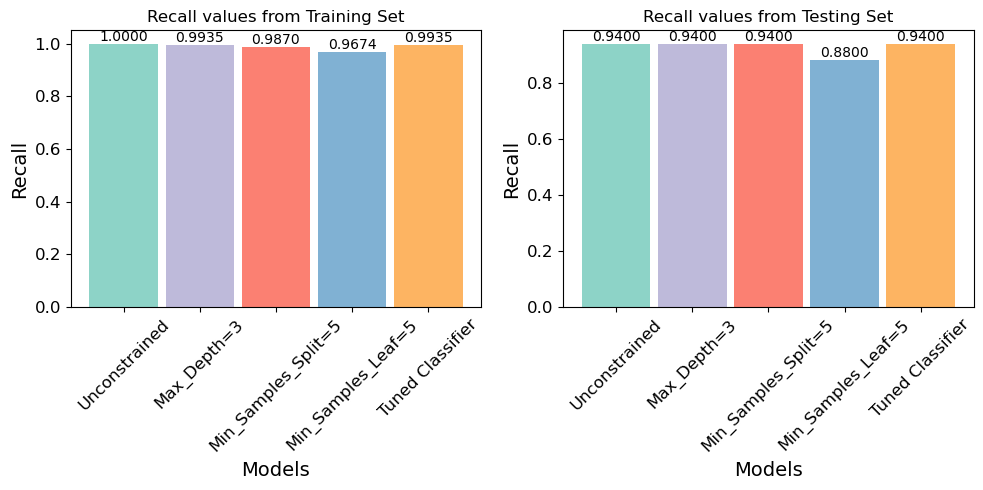

In [30]:
plot_bars(train_recall_set, test_recall_set, 'Recall values from', 'Recall')

Recall is defined as the ratio of true positives (TP) to the sum of true positives and false negatives (FN):

Recall = TP / (TP + FN)

In other words, recall measures the proportion of actual positives that are correctly identified by the model. A high recall value indicates that the model is correctly identifying a large proportion of the positive instances.  In terms of the cancer dataset, a true positive would mean a benign tumor while a false negative would mean a benign tumor that was falsely classified as malignant.

As stated in section 1.7.3, for the cancer dataset we would want a classifier with a very high precision due the the significant cost of false positives. Increasing precision will come at the cost of reduced recall due to the greater number of false negatives predicted. This is an acceptable trade off as a false negative (benign diagnosed as malignant) can be fixed with further diagnosis techniques. 

Based on this, the classifier `Min_Samples_Leaf=5` seems ideal due to it having the highest precision and the lowest recall. However, further inspection of the confusion matrices for each classifier needs to be done before coming to that conclusion.

### 1.7.4 Confusion Matrix

In [136]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(predictions, labels, y):
    # Create the figure and axis objects
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
    # Increase the spacing between the subplots
    fig.subplots_adjust(hspace=15, wspace=0.3)

    # Loop through each axis and plot the corresponding confusion matrix
    for i, ax in enumerate(axs.ravel()):
        if i < len(predictions):
            # Calculate the confusion matrix
            conf_matrix = confusion_matrix(y, predictions[i])

            # Plot the confusion matrix
            disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
            disp.plot(ax=ax, cmap='Oranges', values_format='.0f') # use 'Oranges_r' to reverse the orange colormap
            disp.ax_.set_xlabel('Predicted Label')
            disp.ax_.set_ylabel('True Label')
            disp.ax_.set_title(labels[i])

            # Calculate the accuracy values
            accuracy_0 = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
            accuracy_1 = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])

            # Add accuracy text to the axis
            text = f'Accuracy:\n0: {accuracy_0:.2f}\n1: {accuracy_1:.2f}'
            disp.ax_.text(0.5, -0.5, text, ha='center', va='center', transform=disp.ax_.transAxes, fontsize=12)

    # Add some space between the plots and show the figure
    fig.tight_layout(pad=4.0)
    fig.delaxes(axs[2][1])
    plt.show()

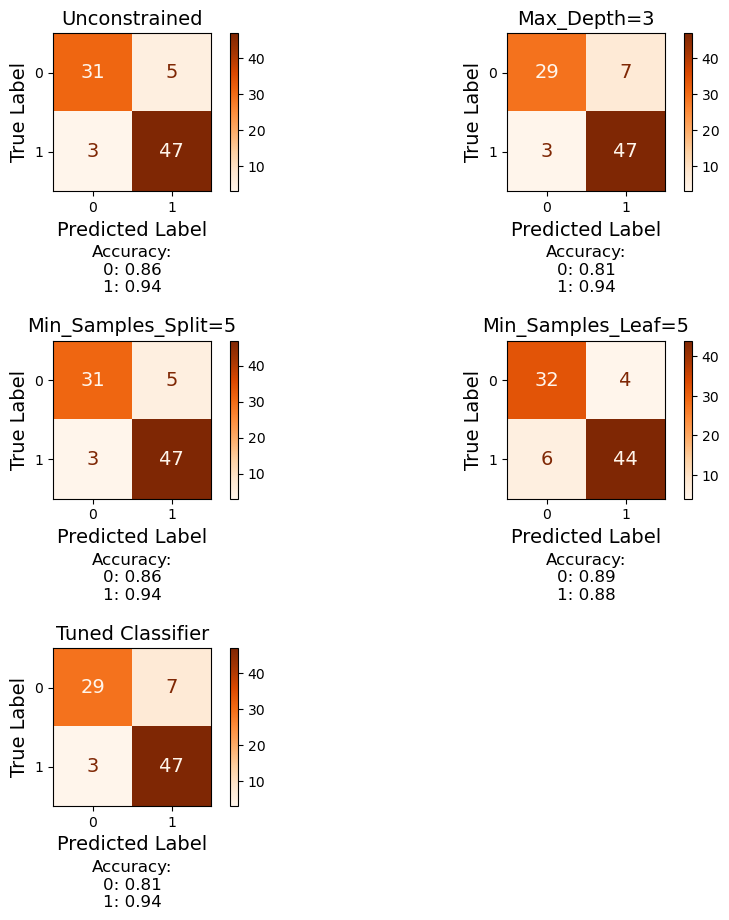

In [137]:
predictions_train = [y_pred_train_default, y_pred_train_depth, y_pred_train_split, y_pred_train_leaf, y_pred_train_best]
predictions_test = [y_pred_test_default, y_pred_test_depth, y_pred_test_split, y_pred_test_leaf, y_pred_test_best]

#plot_confusion_matrix(predictions_train, labels_train, cancer_train_y)
plot_confusion_matrix(predictions_test, labels_test, cancer_test_y)

The plots above show the confusion matrices for the five classifiers on the testing set. Below each confusion matrix is the performace that it has in detecting each class. This is simply `number correctly detected/total number from that class`. This is a useful metric as we have a slightly imbalanced dataset, which contains more instances of the positive class. Measuring the accuracy per class can let us know how the classifier performs on each individual class. 

As stated in the previous sections, we want to maximize the number of negative and false negative predictions in our classifier. This is because it is much more important to successfully detect the negative class (malignant tumors) in this application. Therefore, the `Min_Samples_Leaf=5` classifier which has approximately equal performance in detecting both the positive and negative class is the preferred classifier out of the five. 

## 1.8 Conclusion

# 2 Concrete Slump Dataset

In [32]:
concrete_data = pd.read_csv('slump_test.data')
concrete_data.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [33]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  103 non-null    int64  
 1   Cement                              103 non-null    float64
 2   Slag                                103 non-null    float64
 3   Fly ash                             103 non-null    float64
 4   Water                               103 non-null    float64
 5   SP                                  103 non-null    float64
 6   Coarse Aggr.                        103 non-null    float64
 7   Fine Aggr.                          103 non-null    float64
 8   SLUMP(cm)                           103 non-null    float64
 9   FLOW(cm)                            103 non-null    float64
 10  Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB

By inspection of the dataset, the 'No' column is an instance label which is not part of the classification task. Therefore, we will remove this along with the other two output columns. 

In [34]:
# Dropping the index col
concrete_data.drop('No', axis=1, inplace=True)
# Dropping the other 2 targets
concrete_data.drop('SLUMP(cm)', axis=1, inplace=True)
concrete_data.drop('FLOW(cm)', axis=1, inplace=True)

## 2.1 Visualizing the Data

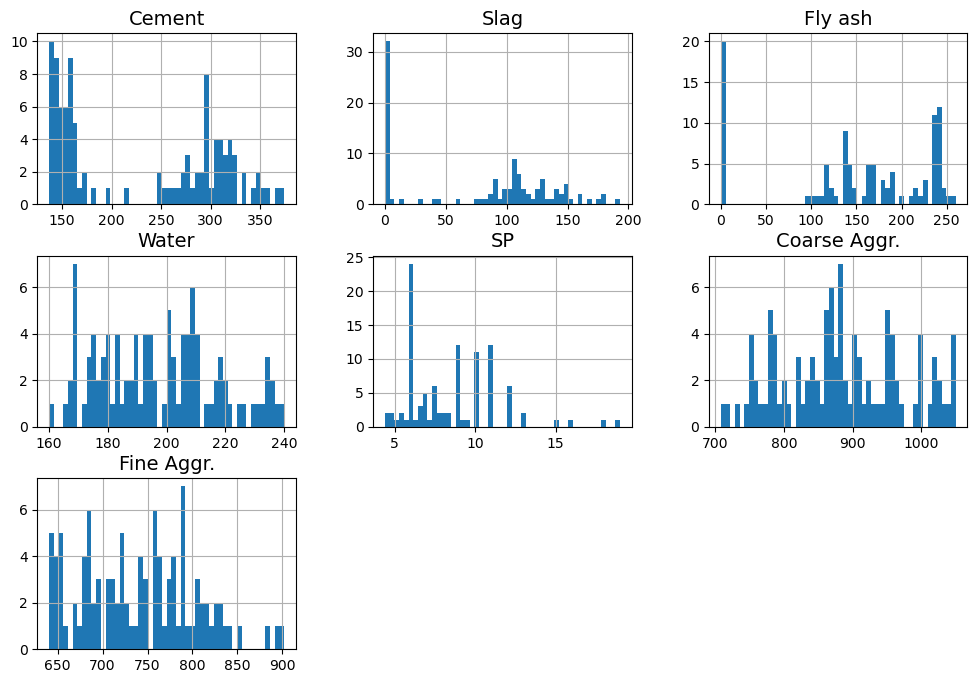

In [35]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

concrete_data.drop('Compressive Strength (28-day)(Mpa)', axis=1).hist(bins=50, figsize=(12, 8))
plt.show()

## 2.2 Splitting the Data

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Splitting the dataset into a training set (80%) and a testing set (20%) randomstate=123
con_train_X, con_test_X, con_train_y, con_test_y = train_test_split(concrete_data.drop('Compressive Strength (28-day)(Mpa)', axis=1), concrete_data['Compressive Strength (28-day)(Mpa)'], test_size=0.20, random_state=123)

# Creating a new instance of the standard scaler
scaler_func_1 = MinMaxScaler(feature_range=(0,1))

con_train_X = scaler_func.fit_transform(con_train_X)
con_test_X = scaler_func.transform(con_test_X)

#Transform back into a pd dataframe
feature_cols = ["Cement","Slag","Fly ash","Water","SP","Coarse Aggr.","Fine Aggr."]
con_train_X=pd.DataFrame(con_train_X, columns=feature_cols)
con_test_X=pd.DataFrame(con_test_X, columns=feature_cols)


## 2.3 Estimators with default parameters

In this section, a linear SVM regressor, linear regressor and a stochastic gradient descent regressor were trained using their default hyperparameters. A voting regressor based on the aforementioned three regressors was also trained using default parameters. 

In [37]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import VotingRegressor

con_svr = SVR(kernel='linear')
con_lin = LinearRegression()
con_sgd = SGDRegressor()
con_voting = VotingRegressor([('Linear_SVR', con_svr), ('Linear-Reg', con_lin), ('SGD_Reg', con_sgd)])

con_lin.fit(con_train_X, con_train_y)
con_svr.fit(con_train_X, con_train_y)
con_sgd.fit(con_train_X, con_train_y)
con_voting.fit(con_train_X, con_train_y)

VotingRegressor(estimators=[('Linear_SVR', SVR(kernel='linear')),
                            ('Linear-Reg', LinearRegression()),
                            ('SGD_Reg', SGDRegressor())])

### 2.3.1 Results and plots

In [38]:
from sklearn.metrics import mean_squared_error

# def plot_con_predictions(regressors):
#     rmse = []
#     indexes = np.arange(0,21,1)

#     plt.plot(indexes, con_test_y, label="GroundTruth")

#     for reg in regressors:
#         y_pred = reg.predict(con_test_X)
#         rmse_val = np.sqrt(mean_squared_error(con_test_y, y_pred))
#         rmse.append(rmse_val)
#         plt.plot(indexes, y_pred, label=reg.__class__.__name__)
#         print("RMSE value for {} regressor is: {}".format(reg.__class__.__name__, rmse_val))

#     plt.legend(loc='best', fontsize=8)
#     plt.xlabel("Index", fontsize=15)
#     plt.ylabel("Value", fontsize=15)
#     plt.title("Predict Values", fontsize=15)
#     plt.show()
    
#     return rmse

In [39]:
from sklearn.metrics import r2_score

def plot_con_predictions(regressors):
    rmse = []
    r2 = []
    
    # Draw dotted line at 45-degree angle
    x = np.linspace(15, 50, 100)
    plt.plot(x, x, '--', color='gray')

    for reg in regressors:
        y_pred = reg.predict(con_test_X)
        rmse_val = np.sqrt(mean_squared_error(con_test_y, y_pred))
        rmse.append(rmse_val)
        r2_score_val = r2_score(con_test_y, y_pred)
        r2.append(r2_score_val)
        plt.scatter(con_test_y, y_pred, label=reg.__class__.__name__)
        print("RMSE value for {} regressor is: {}".format(reg.__class__.__name__, rmse_val))
        print("R2 score for {} regressor is: {}".format(reg.__class__.__name__, r2_score_val))

    plt.legend(loc='best', fontsize=8)
    plt.xlabel("Ground Truth", fontsize=15)
    plt.ylabel("Predicted Value", fontsize=15)
    plt.title("Ground Truth vs Predicted Values", fontsize=15)
    plt.show()

    return rmse, r2

In [40]:
def plot_con_bars(rmse, title):
    labels = ['Linear_SVR', 'Linear-Reg', 'SGD_Reg', 'Voting_Reg']

    colors = ['b', 'g', 'r', 'y']

    fig, ax = plt.subplots()

    # create a bar chart with labels, rmse values, and colors
    ax.bar(labels, rmse, color=colors)

    # add the truncated rmse values on top of each bar
    for i, v in enumerate(rmse):
        ax.text(i, v + 0.01, str(round(v, 5)), ha='center', fontsize=12)

    # set the title and axis labels
    ax.set_title(title + ' Values')
    ax.set_xlabel('Models')
    ax.set_ylabel(title)

    # display the plot
    plt.show()

RMSE value for SVR regressor is: 2.9104631777060246
R2 score for SVR regressor is: 0.7904237972242614
RMSE value for LinearRegression regressor is: 3.2938784151981375
R2 score for LinearRegression regressor is: 0.7315688711845891
RMSE value for SGDRegressor regressor is: 3.1758382427345313
R2 score for SGDRegressor regressor is: 0.7504632598862886
RMSE value for VotingRegressor regressor is: 3.1190419539042793
R2 score for VotingRegressor regressor is: 0.7593088167204906


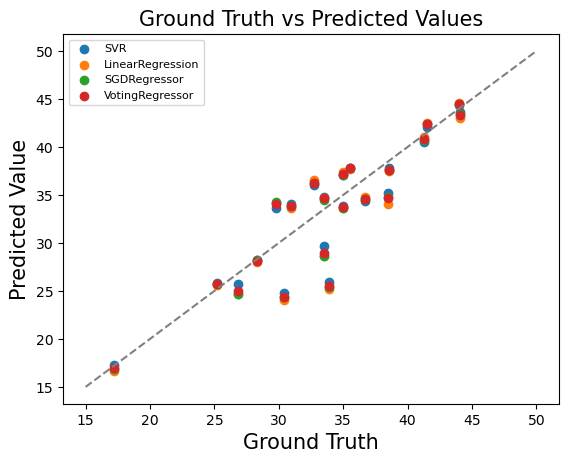

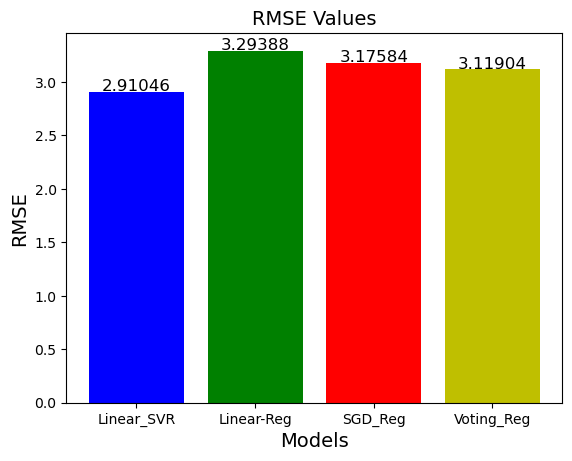

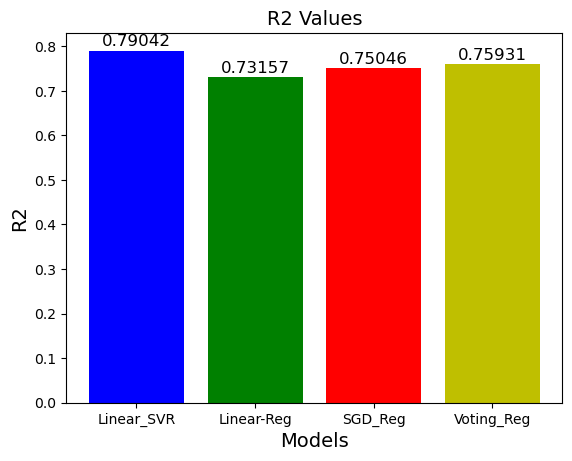

In [41]:
# GET the R2 VALUE FOR EACH REGRESSOR AND PRINT IT
regressors = [con_svr, con_lin, con_sgd, con_voting]

rmse, r2 = plot_con_predictions(regressors)
plot_con_bars(rmse, 'RMSE')
plot_con_bars(r2, 'R2')

A voting regressor combines the strengths of the models that comprise it. Through this, we expect the RMSE value of the voting regressor to be lower than the RMSE value of each of the specific regressors that make up the model. However, in this case we see that the RMSE of the voting regressor (3.12) is higher than the RMSE of the linear SVR regressor (2.91).

A possible explanation for this can be found by examining the predicted values for each regressor versus the ground truth values. For each regressor, the line which illustrates their predictions are so close to each other that they are virtually indistinguishable from one another. These lines all share the same deviation from the ground truth value.

This suggests that the three regressors are likely learning similar patterns in the data. This could happen if the features used by each of the regressors are highly correlated with each other, or if the data itself has a strong linear relationship with the target variable.

Therefore, it is likely that the voting regressor did not significantly improve the prediction performance over any of the individual regressors. The individual regressors may have produced similar predictions that are biased in the same direction, and the voting regressor may simply average these ever so slightly different biased predictions without being able to correct them.

## 2.4 Tuning Hyperparameters

### 2.4.1 Linear SVR Regressor

In [42]:
svr = SVR(kernel='linear')

# Define the hyperparameters and their possible values for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'epsilon': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

# Create a grid search object with 3-fold cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='neg_root_mean_squared_error')
# Fit the grid search object to the training data
grid_search.fit(con_train_X, con_train_y)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation score:", grid_search.best_score_)

Best hyperparameters: {'C': 10, 'epsilon': 1}
Best cross-validation score: -2.529991601729001


When tuning the SVR Regressor the following hyperparameters were considered:
- kernel: This was set to linear as per the assignment specifications 
- C: The regularization parameter
    - A logarithmic scale from 0.0001 to 1000 was used in the grid search was used to cover a wide range of values from a very small regularization strength to a very high one
    - A smaller value of C will give a smoother decision boundary while a large value of C will allow the model to fit more closely to the training data. It is important to take note of the value of C as too large values could result in overfitting of the model
- epsilon: It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.
    - A logarithmic scale from 0.01 to 1000 was used in the grid search was used to cover a wide range of values from a very small margin to a very large one
    - This will greatly impact the impact that outliers have on the model fit. 

### 2.4.2 SGD Regressor

In [43]:
sgd = SGDRegressor()

# Define the hyperparameters and their possible values for grid search
param_grid = {
    'alpha': [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet']
}

# Create a grid search object with 3-fold cross-validation
grid_search = GridSearchCV(sgd, param_grid, cv=3, scoring='neg_root_mean_squared_error')
# Fit the grid search object to the training data
grid_search.fit(con_train_X, con_train_y)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation score:", grid_search.best_score_)

Best hyperparameters: {'alpha': 0.001, 'penalty': 'l1'}
Best cross-validation score: -2.6543865074514863


When tuning the SGD Regressor the following hyperparameters were considered:

- alpha: Constant that multiplies the regularization term. The higher the value, the stronger the regularization.
    - A logarithmic scale from 0.0001 to 1000 was used in the grid search was used to cover a wide range of values from a very small regularization strength to a very high one
    - A small alpha value will allow the model to fit the training data more closely, which may result in overfitting. A large alpha value will make the model simpler. 
- penalty: The penalty (aka regularization term) to be used.

### 2.4.3 Estimators with tuned parameters

In [44]:
con_svr_tuned = SVR(kernel='linear', C=10, epsilon=1)
con_lin_tuned = LinearRegression()
con_sgd_tuned = SGDRegressor(alpha=0.0001, penalty='l1')
con_voting_tuned = VotingRegressor([('Linear_SVR', con_svr_tuned), ('Linear-Reg', con_lin_tuned), ('SGD_Reg', con_sgd_tuned)])

con_lin_tuned.fit(con_train_X, con_train_y)
con_svr_tuned.fit(con_train_X, con_train_y)
con_sgd_tuned.fit(con_train_X, con_train_y)
con_voting_tuned.fit(con_train_X, con_train_y)

VotingRegressor(estimators=[('Linear_SVR',
                             SVR(C=10, epsilon=1, kernel='linear')),
                            ('Linear-Reg', LinearRegression()),
                            ('SGD_Reg', SGDRegressor(penalty='l1'))])

RMSE value for SVR regressor is: 3.5007749804403128
R2 score for SVR regressor is: 0.6967881696434817
RMSE value for LinearRegression regressor is: 3.2938784151981375
R2 score for LinearRegression regressor is: 0.7315688711845891
RMSE value for SGDRegressor regressor is: 3.1821926713557107
R2 score for SGDRegressor regressor is: 0.7494636814238116
RMSE value for VotingRegressor regressor is: 3.31618127075096
R2 score for VotingRegressor regressor is: 0.7279214694380449


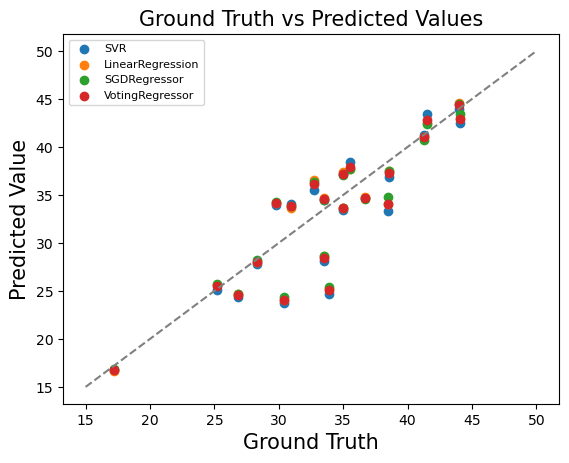

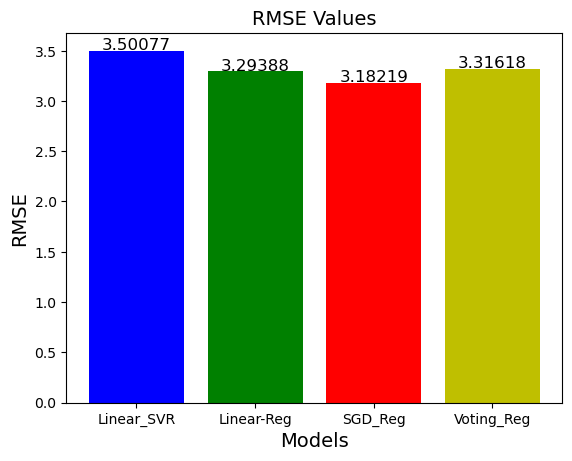

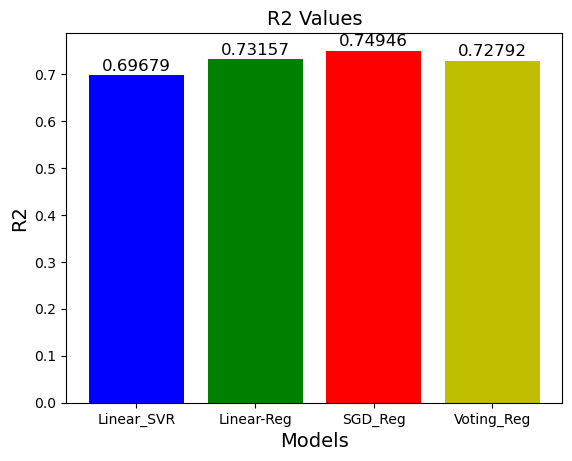

In [45]:
regressors = [con_svr_tuned, con_lin_tuned, con_sgd_tuned, con_voting_tuned]

rmse, r2 = plot_con_predictions(regressors)
plot_con_bars(rmse, 'RMSE')
plot_con_bars(r2, 'R2')

It can be seen from the plot of ground truth values versus the predicted values that the predicted values of the tuned regressor deviated further from the ground truth values than the previous regressor. This is corroborated by the increase in RMSE values across each regressor. 

A possible answer for this phenomenon is that the tuning hyperparameters resulted in overfitting. This can happen when the model is too complex for the given dataset, and the hyperparameters are tuned to fit the training set too closely, leading to poor  generalization on the test set.

Another possibility is that the tuning process changed the behavior of the individual regressors and caused them to become less complementary in the voting ensemble. This can happen if the tuning process led to the individual regressors becoming more similar in their predictions, which would reduce the diversity of the ensemble and make it less effective. This can be reflected in the following ways:

- Increased bias: when the base estimators are tuned to be too similar, they tend to make similar errors which could amplify biases in the model. 
- Variance: The goal of a voting regressor is to use average of multible base regressors to reduce the variance. However, by making our model less diverse, we lose the benefit of taking the average and are not actually lowering the variance in the model. 

## 2.5 Conclusion

In [46]:
# error percentage with the smallest value in the test set
print('Minimum value:', con_test_y.min())
print('Percentage of value:', ((rmse[3]/con_test_y.min())*100).round(2), '%')
# error percentage with the largest value in the test set
print('Maximum value:', con_test_y.max())
print('Percentage of value:', ((rmse[3]/con_test_y.max())*100).round(2), '%')


Minimum value: 17.19
Percentage of value: 19.29 %
Maximum value: 44.08
Percentage of value: 7.52 %


Concrete is an essential building material in many construction projects and it forms the conerstone building material in may projects, from kerbs to skyscrapers. Therefore, it is essential to determine the correct compressive strength of the building material to ensure that we are meeting the standards outlined in the National Construction Code (NCC). Incorrect measurements of ingredients could mean that the concrete does not have the capacity to support the load of the structure that it is made of. 

The RMSE value of the voting regressor with tuned parameters obtained in Section 2.4.3 is 3.32. This means that any value that the voting regressor predicts has an error of +- 3.32. This represents an error of 7.45% - 19.33% as shown in the cell above. 

This error is simply too large for the regressor to be of any use in real applications as an error of nearly 20% in the worst case scenario is simply unacceptable. When calculating the loads on the building, an engineer cannot rely on a model that gives such large margins of error to safely complete his design. 

# 3 Abalone Dataset

The data from abalone.data is read in and inspected for anomalies. There are no null values in the dataset that need to be ammended. The 'Sex' column is in text form so it is transformed into numerical values using the ordinal encoder.

In [47]:
from sklearn.preprocessing import OrdinalEncoder

# Read in data
ab_data = pd.read_csv('abalone.data')
# Col names from https://archive.ics.uci.edu/ml/datasets/Abalone
col_names = ["Sex","Length","Diameter continuous","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
ab_data.columns=col_names

# Creating an instance of the ordinal encoder 
enc = OrdinalEncoder(categories=[['M','F','I']])
ab_data['Sex'] = enc.fit_transform(ab_data['Sex'].values.reshape(-1,1))

ab_data.head()

,Sex,Length,Diameter continuous,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2.0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [48]:
# perform data inspection for null values
print(ab_data.isnull().sum()) 

Sex                    0
Length                 0
Diameter continuous    0
Height                 0
Whole weight           0
Shucked weight         0
Viscera weight         0
Shell weight           0
Rings                  0
dtype: int64


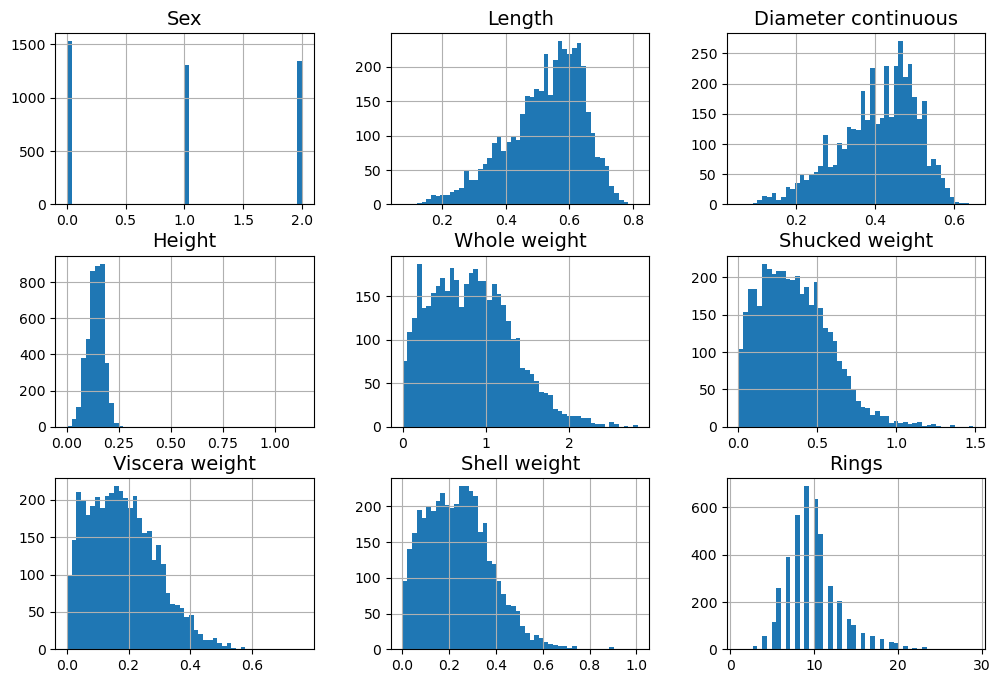

In [49]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ab_data.hist(bins=50, figsize=(12, 8))
plt.show()

On inspection of the histograms for each of the features, it is noticable that length and diameter continuous have a left skew while the remaining variables have a right skew. These will need to be scaled appropirately in order for the machine learning algorithm to process them properly. 

A decision tree algorithm may be influenced by this skewness as it might be biased towards splitting the data based on the skewed variables rather than variables with higher predictive power. This will need to be closely monitored.

In [50]:
# Splitting the dataset into a training set (85%) and a testing set (15%) randomstate=123
ab_train_X, ab_test_X, ab_train_y, ab_test_y = train_test_split(ab_data.drop('Rings', axis=1), ab_data['Rings'], test_size=0.15, random_state=123)

# Creating a new instance of the standard scaler
scaler_func_2 = MinMaxScaler(feature_range=(0,1))

ab_train_X = scaler_func.fit_transform(ab_train_X)
ab_test_X = scaler_func.transform(ab_test_X)

#Transform back into a pd dataframe
feature_cols = ["Sex","Length","Diameter continuous","Height","Whole weight","Shucked weight","Viscera weight","Shell weight"]
ab_train_X=pd.DataFrame(ab_train_X, columns=feature_cols)
ab_test_X=pd.DataFrame(ab_test_X, columns=feature_cols)

## 3.1 Tuning Max_Depth

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

def tune_max_depth():
    # Set the range of max_depth values to test
    max_depths = range(1, 21)

    # Initialize empty lists to store the errors
    train_errors = []
    cv_errors = []
    test_errors = []

    # Loop through each value of max_depth and fit a decision tree regression model
    for max_depth in max_depths:
        dt = DecisionTreeRegressor(max_depth=max_depth)

        # Evaluate the model using cross-validation
        cv_scores = cross_val_score(dt, ab_train_X, ab_train_y, cv=3, scoring='neg_mean_squared_error')
        cv_error = -1 * cv_scores.mean()
        cv_errors.append(cv_error)

        # Fit the model on the training data and evaluate its performance on the training set
        dt.fit(ab_train_X, ab_train_y)
        train_error = ((dt.predict(ab_train_X) - ab_train_y) ** 2).mean()
        train_errors.append(train_error)

        # Evaluate the model on the test data
        test_error = ((dt.predict(ab_test_X) - ab_test_y) ** 2).mean()
        test_errors.append(test_error)

    min_cv_error = min(cv_errors)
    min_cv_error_index = cv_errors.index(min_cv_error)
    best_max_depth_cv = max_depths[min_cv_error_index]

    min_test_error = min(test_errors)
    min_test_error_index = test_errors.index(min_test_error)
    best_max_depth_test = max_depths[min_test_error_index]

    print('max_depth that minimizes cv error:', best_max_depth_cv)
    print('max_depth that minimizes test error:', best_max_depth_test)

    # Plot the errors as a function of max_depth
    plt.plot(max_depths, train_errors, label='Training error')
    plt.plot(max_depths, cv_errors, label='Cross-validation error')
    plt.plot(max_depths, test_errors, label='Test error')
    plt.xlabel('max_depth')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

max_depth that minimizes cv error: 5
max_depth that minimizes test error: 4


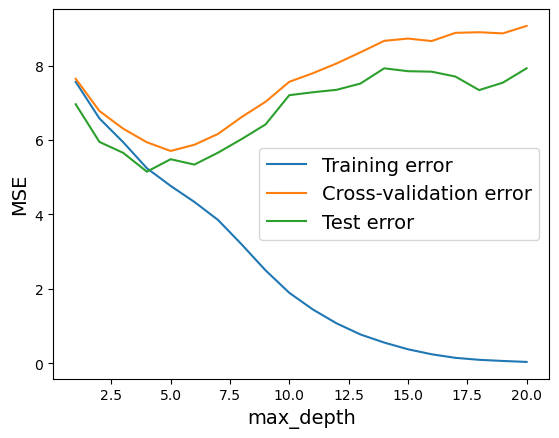

In [52]:
tune_max_depth()

Upon examination of the graph of MSE vs max_depth, we can see that after max_depth=5 the error on the training set drops dramatically while the error on the test and cross-validation sets rises. This is a sign of the model overfitting. 

The value of max_depth chosen based on the plot of training errors, cross-validation errors and test errors as a function max depth is 5.

We want to minimize the cross-validation error rather than the test error because the primary purpose of cross-validation is to estimate the model's performance on new, unseen data. Cross-validation provides an estimate of the generalization error of the model, which is the error that the model is expected to make on new data.

Minimizng the error on the test set could also result in overfitting when the model is used to predict new unseen data in the future.

## 3.2 Tuning Min_Samples_Leaf

In [53]:
def tune_min_samples_leaf():

    # Set the range of min_leaf values to test
    min_leafs = range(1, 150)

    # Initialize empty lists to store the errors
    train_errors = []
    cv_errors = []
    test_errors = []

    # Loop through each value of min_leaf and fit a decision tree regression model
    for min_leaf in min_leafs:
        dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=min_leaf)

        # Evaluate the model using cross-validation
        cv_scores = cross_val_score(dt, ab_train_X, ab_train_y, cv=3, scoring='neg_mean_squared_error')
        cv_error = -1 * cv_scores.mean()
        cv_errors.append(cv_error)

        # Fit the model on the training data and evaluate its performance on the training set
        dt.fit(ab_train_X, ab_train_y)
        train_error = ((dt.predict(ab_train_X) - ab_train_y) ** 2).mean()
        train_errors.append(train_error)

        # Evaluate the model on the test data
        test_error = ((dt.predict(ab_test_X) - ab_test_y) ** 2).mean()
        test_errors.append(test_error)

    min_cv_error = min(cv_errors)
    min_cv_error_index = cv_errors.index(min_cv_error)
    best_min_samples_leaf_cv = min_leafs[min_cv_error_index]

    min_test_error = min(test_errors)
    min_test_error_index = test_errors.index(min_test_error)
    best_min_samples_leaf_test = min_leafs[min_test_error_index]

    print('min_samples_leaf that minimizes cv error:', best_min_samples_leaf_cv)
    print('min_samples_leaf that minimizes test error:', best_min_samples_leaf_test)

    # Plot the errors as a function of min_leaf
    plt.plot(min_leafs, train_errors, label='Training error')
    plt.plot(min_leafs, cv_errors, label='Cross-validation error')
    plt.plot(min_leafs, test_errors, label='Test error')
    plt.xlabel('min_leaf')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

min_samples_leaf that minimizes cv error: 54
min_samples_leaf that minimizes test error: 59


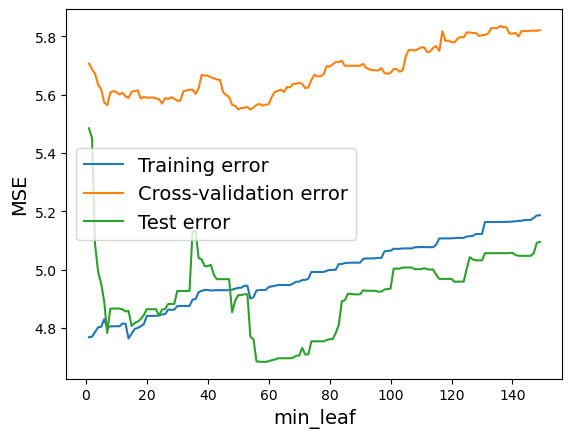

In [54]:
tune_min_samples_leaf()

The value of min_samples_leaf based on the plot of training errors, cross-validation errors and test errors as a function max depth is 54.

We want to minimize the cross-validation error rather than the test error because the primary purpose of cross-validation is to estimate the model's performance on new, unseen data. Cross-validation provides an estimate of the generalization error of the model, which is the error that the model is expected to make on new data.

Minimizng the error on the test set could also result in overfitting when the model is used to predict new unseen data in the future.

However, we need to consider what the 'min_samples_leaf' hyperparameter controls in the model: it sets the minimum number of samples required to be at a leaf node of the tree. By setting 'min_samples_leaf' to be too high, the tree may not be able to capture the complex relationships present in the data which results in an oversimplified model underfitting. 

An underfitting model will also have higher predictive bias which would impact the prediction capabilities for smaller groups in the data. This is relevant for our data as the histogram for our data shows a high concentration of rings around 10 with tails going out towards either side of it.

Therefore, we will choose the next best value that minimizes cv error which is 7. 

## 3.3 Random Forest with 500 Estimators 

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor with best hyperparameters
forest = RandomForestRegressor(max_depth=5, bootstrap=True, max_features='log2', min_samples_leaf=7)
# fit regressor to training data
forest.fit(ab_train_X, ab_train_y)
# predict on test set
y_pred_full = forest.predict(ab_test_X)
# round to closest int
np.rint(y_pred_full)
# get rmse value
forest_rmse = np.sqrt(mean_squared_error(ab_test_y, y_pred_full))
print('The RMSE on the test set is:', forest_rmse)

The RMSE on the test set is: 2.126562154561531


The following random forest regressor has been trained with the best hyperparameters. The best value of max_depth and min_samples_leaf have been found in section 3.1 and 3.2. Two additional hyperparameters have been tested, `bootstrap` and `max_features`.

`bootstrap`: Bootstrap is a sampling technique used in the training of random forest regressors. In bootstrap sampling, multiple samples are drawn randomly from the original dataset with replacement, which means that some of the same samples may appear in multiple bootstrap samples and some samples may be missing from a bootstrap sample. From manual testing with bootstrap True and False, it was found that a regressor with bootstrap enabled performed better than a regressor with bootstrap disabled.

`max_features`: The 'max_features' hyperparameter is used to introduce randomness in the training process and reduce the correlation among the decision trees in the random forest. By randomly selecting a subset of features at each node, the model can avoid overfitting and capture a broader range of patterns and relationships in the data. The best value of max_features found was log2.

Therefore the hyperparameters used to train the RandomForestRegressor was:

- booststrap: True
- max_depth: 5
- max_features: log2
- min_samples_leaf: 7


Comparison and discussion of the RMSE and other results from this regressor will be discussed in section 3.5

## 3.4 Feature Selection

In [56]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(forest, prefit=True, threshold=0.05)
selected_features = selector.get_support(indices=True)
#print("The feature mask is:", selected_features)

selected_feature_names = ab_train_X.columns[selected_features]
selected_feature_importances = forest.feature_importances_[selected_features]

# Print the selected features and their importance values
total_importances = 0
print("Selected Features and their Importance Values:")
for feature, importance in zip(selected_feature_names, selected_feature_importances):
    total_importances += importance
    print(feature, ":", importance)

print("Total Importance Value Retained:", total_importances)

features_to_drop = ['Sex', 'Length']

ab_train_X_1 = ab_train_X.drop(features_to_drop, axis=1)
ab_test_X_1 = ab_test_X.drop(features_to_drop, axis=1)

Selected Features and their Importance Values:
Diameter continuous : 0.06565016113872259
Height : 0.16697860178681082
Whole weight : 0.1353239129883318
Shucked weight : 0.08347602604240852
Viscera weight : 0.10400911827389031
Shell weight : 0.3881679194086393
Total Importance Value Retained: 0.9436057396388033


# PUT IN BAR GRAPH?

Section 3.4 uses the SelectFromModel() to perform feature selection. We set the importance threshold to be 0.05. This means that only features which have an importance value of 0.05 will be retained.

The get.support() function returns a feature mask of the features which meet this criteria. From this we can see that 'Sex' and 'Length' fall under the threshold of 0.05. These will be dropped from the feature set and the model will be retrained on the reduced dimension features.  

The remaining features have their importance values computed and summed. This leaves us with a total importance value retained of 0.94. This suggets that the features that we retained are highly important to the model's predictions. 

Of the 6 remaining features, it can be observed that 'height' and 'shell weight' are the most important features, with the two features making up a collective 60% of the feature importances. 

In [57]:
ab_train_X_1.head()

,Diameter continuous,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.832896,-0.700177,-0.678509,-0.458399,-0.557740,-0.945002
1,0.873134,0.250446,0.769926,1.089427,0.379027,0.713628
2,-1.986975,-1.650799,-1.465702,-1.418500,-1.403559,-1.478772
3,0.020119,0.012790,-0.343317,-0.456156,-0.166663,-0.310925
4,0.722602,0.963412,0.797350,0.918941,1.061138,0.702881


In [58]:
# Create a random forest regressor with best hyperparameters
forest_1 = RandomForestRegressor(max_depth=5, bootstrap=True, max_features='log2', min_samples_leaf=7)
# fit regressor to training data
forest_1.fit(ab_train_X_1, ab_train_y)
# predict on test set
y_pred_red = forest_1.predict(ab_test_X_1)
# round to closest int
np.rint(y_pred_red)
# get rmse value
forest_rmse_reduced = np.sqrt(mean_squared_error(ab_test_y, y_pred_red))
print('The RMSE on the test set is:', forest_rmse)

The RMSE on the test set is: 2.126562154561531


The training and prediction process from Section 3.3 was repeated with the reduced dimensional data. In larger datasets we will expect to see an increase in the RMSE value of the predictions as we are removing features that contain information that is relevant to making predictions. This will lead to less accurate predictions.

However, in this instance, after training the model on the reduced dimensional data we observe that the RMSE value remains exactly the same. This could be due to the fact that the feature dimension is already quite small.

This offers a benefit to our model as we are able to reduce the complexity, and subsequently the required compute power and time, while suffering no penalty to the accuracy of the model. 

## 3.5 Comparing the Regressors

In [59]:
def plot_ab_histograms():
    fig, (ax1) = plt.subplots(ncols=1, figsize=(10,5))

    # Plot the histograms in each subplot
    ax1.hist(ab_train_y, bins=20, alpha=0.5)
    ax1.set_xlabel('Ring Values')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Distribution of Ring Values in Train Data')

    # Adjust the spacing between the subplots
    plt.subplots_adjust(wspace=0.3)

    # Show the plot
    plt.show()

In [60]:
def plot_ab_ground_truth():    
    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

    # Plot the ground truth versus predicted values in each subplot
    ax1.scatter(ab_test_y, y_pred_full, alpha=0.5)
    ax1.set_xlabel('Ground Truth')
    ax1.set_ylabel('Predicted Values')
    ax1.set_title('Full Feature Set')

    ax2.scatter(ab_test_y, y_pred_red, alpha=0.5)
    ax2.set_xlabel('Ground Truth')
    ax2.set_ylabel('Predicted Values')
    ax2.set_title('Reduced Feature Set')

    # Add a 45 degree dashed red line to both plots
    max_val = max(np.max(ab_test_y), np.max(y_pred_full), np.max(y_pred_red))
    min_val = min(np.min(ab_test_y), np.min(y_pred_full), np.min(y_pred_red))
    line_vals = np.linspace(min_val, max_val, 10)
    ax1.plot(line_vals, line_vals, 'r--')
    ax2.plot(line_vals, line_vals, 'r--')

    # Adjust the spacing between the subplots
    plt.subplots_adjust(wspace=0.3)

    # Show the plot
    plt.show()

In [61]:
def plot_error_vs_ring():
    # Calculate the errors for each prediction
    error_full = y_pred_full - ab_test_y
    error_red = y_pred_red - ab_test_y

    # Set up the figure with four subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,5))

    # Plot the errors versus ring values in each subplot
    ax1.scatter(ab_test_y, np.abs(error_full), alpha=0.5)
    ax1.set_xlabel('Ring Values')
    ax1.set_ylabel('Absolute Error')
    ax1.set_title('Full Feature Set, Full Model')

    ax2.scatter(ab_test_y, np.abs(error_red), alpha=0.5)
    ax2.set_xlabel('Ring Values')
    ax2.set_ylabel('Absolute Error')
    ax2.set_title('Reduced Feature Set, Full Model')

    # Add the zero error line
    line_vals = np.linspace(np.min(ab_test_y), np.max(ab_test_y), 10)
    ax1.plot(line_vals, np.zeros_like(line_vals), 'r--', label='0 error')
    ax2.plot(line_vals, np.zeros_like(line_vals), 'r--', label='0 error')

    # Add a legend to each subplot
    ax1.legend()
    ax2.legend()

    # Adjust the spacing between the subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.4)

    # Show the plot
    plt.show()

In [62]:
def plot_average_error():
    # Calculate the errors for each prediction
    error_full = y_pred_full - ab_test_y
    error_red = y_pred_red - ab_test_y

    # Calculate the average error for each unique ring value
    unique_rings = np.unique(ab_test_y)
    mean_error_full = [np.mean(error_full[ab_test_y == i]) for i in unique_rings]
    mean_error_red = [np.mean(error_red[ab_test_y == i]) for i in unique_rings]

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

    # Plot the average error versus ring value for each prediction in each subplot
    ax1.plot(unique_rings, np.abs(mean_error_full), label='Full Feature Set')
    ax1.set_xlabel('Ring Value')
    ax1.set_ylabel('Absolute Average Error')
    ax1.set_title('Full Feature Set')

    ax2.plot(unique_rings, np.abs(mean_error_red), label='Reduced Feature Set')
    ax2.set_xlabel('Ring Value')
    ax2.set_ylabel('Absolute Average Error')
    ax2.set_title('Reduced Feature Set')

    # Add a legend to each subplot
    ax1.legend()
    ax2.legend()

    # Adjust the spacing between the subplots
    plt.subplots_adjust(wspace=0.3)

    # Show the plot
    plt.show()

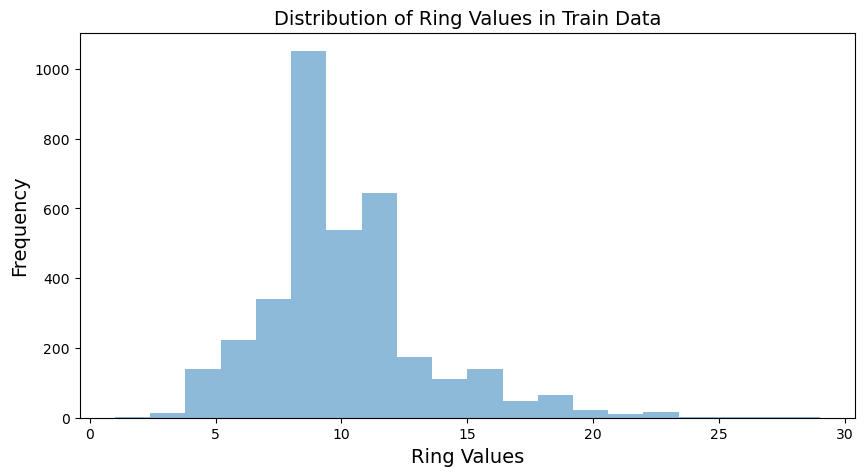

In [63]:
plot_ab_histograms()

The plot above shows the distribution of ring values in the dataset. It can be noted that the majority of values in the train set is concentrated around 10 rings. There are significantly less values greater and lesser than this number. The skewed dataset will impact the prediction ability of our classifier as seen in the next plots. 

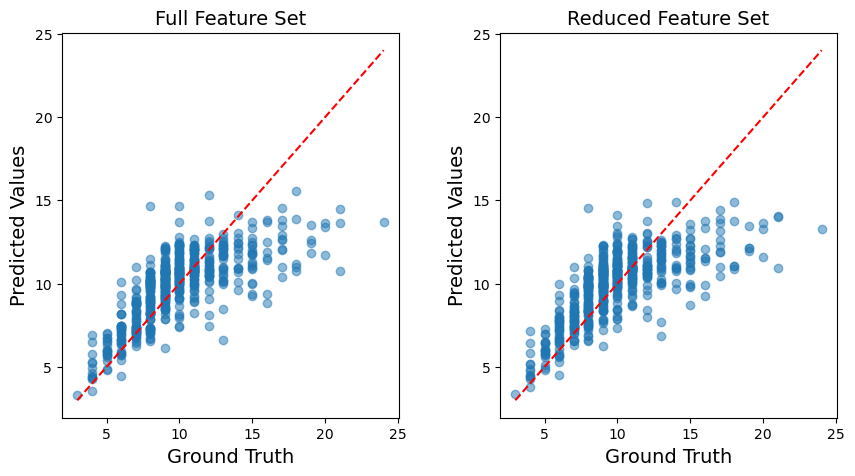

In [64]:
plot_ab_ground_truth()

The plot above shows predicted values versus ground truth values. This plot reveals an interesting phenomenon that is a result of the skewed dataset. For lower ring values, the predicted values are tightly clustered around the 45 degree line. This shows that the classifier has done a decent job in prediciting the ring values close to the ground truth. 

However, when we move to the larger ring values where training instances were more sparse, we see the predicted values deviate vastly from their ground truth values. Interestingly, the regressor predicts values for those very similar the smaller ring values. For example, for a ground truth value of 25, the regressor might predict 14. This behaviour can be observed in both the full and reduced feature set. 

One explanation for this is that decision tree regressor splits the data in a way that maximizes information gain at each node. Since the majority of the data points in the train set have lower ground truth values, the splits will favour predicitng those values. This form of biased splitting is exactly what we have observed in the plot below.

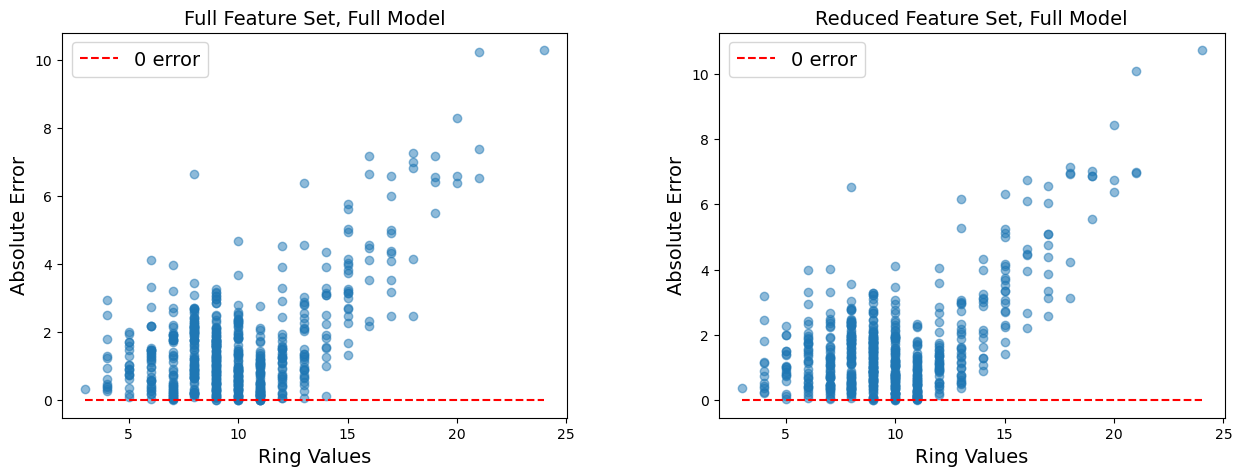

In [65]:
plot_error_vs_ring()

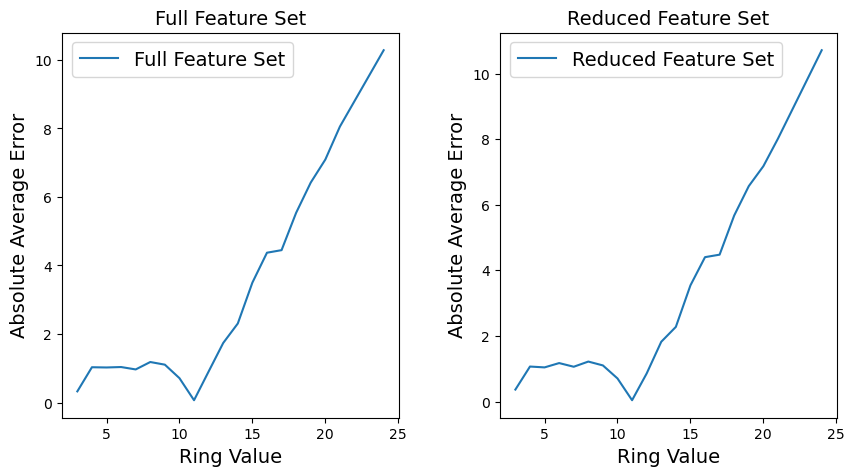

In [66]:
# ADD POINTS TO THIS CURVE

plot_average_error()

The plots above shows the absolute error vs ring values for the full and reduced sets. The plot after that shows the absolute average error vs ring values for the full and reduced sets.

The conclusions from the cell above are corroborated by these plots. It can be seen that for lower ring values, the regressor is predicting values that have on average an error of 1. However, when we move to higher ring values (12 and above) the error vastly increases. This shows that our regressor is biased towards lower ring values. This number 12 is also seen on the first histogram plot where the number of training instances drop off shrply after this point. 

## 3.6 Bagging Regressor

***STUFF I NEED TO DO***
- tune the SVR regressor 'manually' bruh
- tune the bagging regressor 'manually' BRUH
- COMPARE WITH MY BEST FOREST REGRESSOR 
- die
- do some rmse stuff 
- do all those diagrams from above 
    - looks like we retoolin those functioons

In [67]:
from sklearn.ensemble import BaggingRegressor
#experiment with hyperparameters from task sheet
bag = BaggingRegressor(SVR(kernel='rbf',gamma='auto',C=20),n_estimators=500,n_jobs=-1)

bag.fit(ab_train_X, ab_train_y)

# predict on the test set
y_pred_bag = bag.predict(ab_test_X)
np.rint(y_pred_bag)

bag_rmse = np.sqrt(mean_squared_error(ab_test_y, y_pred_bag))
print('The RMSE on the test set is:', bag_rmse)

The RMSE on the test set is: 2.043130781426134


In [68]:
def plot_ab_ground_truth_bag():    
    # Set up the figure with two subplots
    fig, (ax1) = plt.subplots(ncols=1, figsize=(10,5))

    # Plot the ground truth versus predicted values in each subplot
    ax1.scatter(ab_test_y, y_pred_bag, alpha=0.5)
    ax1.set_xlabel('Ground Truth')
    ax1.set_ylabel('Predicted Values')
    ax1.set_title('Bagging Regressor')

    # Add a 45 degree dashed red line to both plots
    max_val = max(np.max(ab_test_y), np.max(y_pred_bag))
    min_val = min(np.min(ab_test_y), np.min(y_pred_bag))
    line_vals = np.linspace(min_val, max_val, 10)
    ax1.plot(line_vals, line_vals, 'r--')
    
    # Adjust the spacing between the subplots
    plt.subplots_adjust(wspace=0.3)

    # Show the plot
    plt.show()

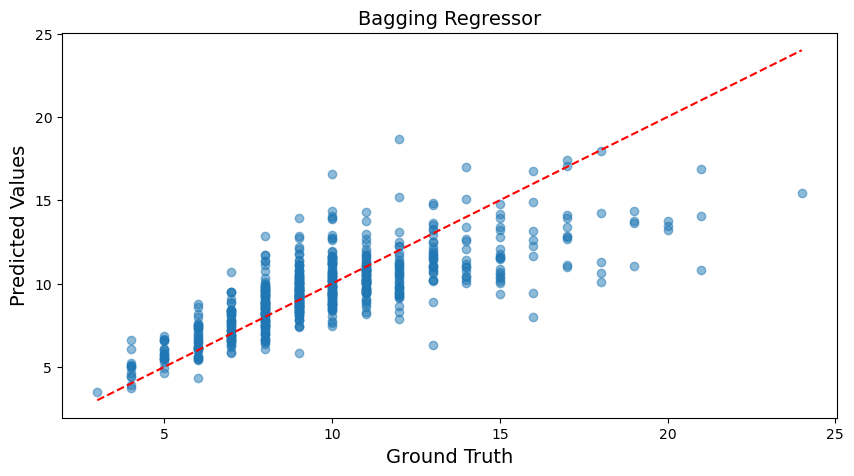

In [69]:
plot_ab_ground_truth_bag()

## 3.6.1 Bagging vs Random Forest Regressor

In [70]:
comparison = [forest_rmse, bag_rmse]

def compare_forest_bagging(rmse):
    labels = ['Random Forest', 'Bagging Regressor']

    colors = ['b', 'g']

    fig, ax = plt.subplots(figsize=(8,6))

    # create a bar chart with labels, rmse values, and colors
    ax.bar(labels, rmse, color=colors)

    # add the truncated rmse values on top of each bar
    for i, v in enumerate(rmse):
        ax.text(i, v + 0.01, str(round(v, 5)), ha='center', fontsize=10)

    # set the title and axis labels
    ax.set_title('RMSE Values')
    ax.set_xlabel('Models')
    ax.set_ylabel('RMSE')

    # display the plot
    plt.show()

The bagging regressor has a lower RMSE than the random forest regressor. 

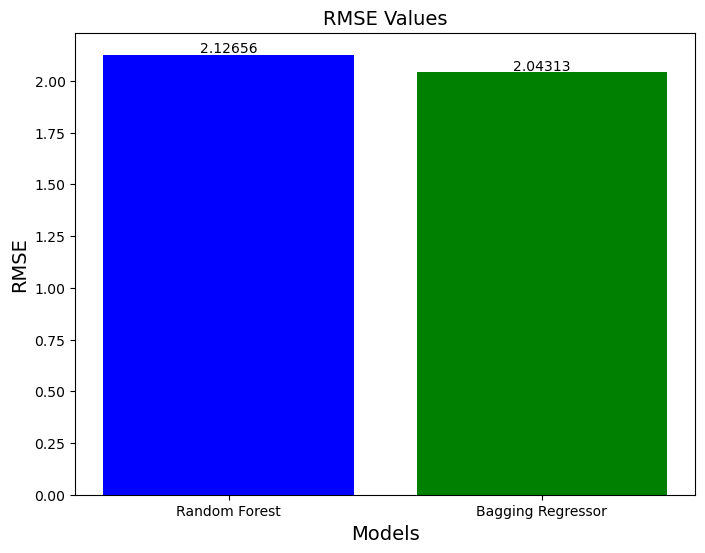

In [71]:
compare_forest_bagging(comparison)